In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

lr = LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 
lda = LinearDiscriminantAnalysis(solver='svd')
qda = QuadraticDiscriminantAnalysis()

%matplotlib inline

In [2]:
df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [3]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0: 
        Methane_bin.append(int(1))
    else:
        Methane_bin.append(int(0))
for i in df['Ethylene']:
    if i > 0.0: 
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin

In [5]:
df.head()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,...,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49,0,0
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,...,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03,0,0
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,...,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24,0,0
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,...,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84,0,0
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,...,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59,0,0


In [6]:
df.describe()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,...,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,...,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03,4.426828e-01,4.314846e-01
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,...,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02,4.967039e-01,4.952834e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,...,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02,0.000000e+00,0.000000e+00
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,...,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03,0.000000e+00,0.000000e+00
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,...,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03,0.000000e+00,0.000000e+00
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,...,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03,1.000000e+00,1.000000e+00
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,...,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 21 columns):
Time            float64
Methane         float64
Ethylene        float64
1               float64
2               float64
3               float64
4               float64
5               float64
6               float64
7               float64
8               float64
9               float64
10              float64
11              float64
12              float64
13              float64
14              float64
15              float64
16              float64
Methane Bin     int64
Ethylene Bin    int64
dtypes: float64(19), int64(2)
memory usage: 669.5 MB


# Split Data into Train, Test, and Deployment Sets

In [3]:
x1 = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
# y1_meth = df['Methane Bin']
# y2_ethy = df['Ethylene Bin']
y = df[['Methane', 'Ethylene']]

# methane
# x_meth_train, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1_meth, test_size=0.50, random_state=42)

# ethylene
# x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, y2_ethy, test_size=0.50, random_state=42)

# Split data sets evenly into training, deployment, and non-deployment
x1_deployment, x1_nondeployment, y_deployment, y_nondeployment = train_test_split(x1, y, test_size=0.67, random_state=42, shuffle = False)
x1_train, x1_test, y_train, y_test = train_test_split(x1_nondeployment, y_nondeployment, test_size=0.5, random_state=42, shuffle = False)

In [11]:
x1_deployment.info(), x1_nondeployment.info(), x1_train.info(), x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378906 entries, 0 to 1378905
Data columns (total 17 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1378906 non-null  float64
 1   1       1378906 non-null  float64
 2   2       1378906 non-null  float64
 3   3       1378906 non-null  float64
 4   4       1378906 non-null  float64
 5   5       1378906 non-null  float64
 6   6       1378906 non-null  float64
 7   7       1378906 non-null  float64
 8   8       1378906 non-null  float64
 9   9       1378906 non-null  float64
 10  10      1378906 non-null  float64
 11  11      1378906 non-null  float64
 12  12      1378906 non-null  float64
 13  13      1378906 non-null  float64
 14  14      1378906 non-null  float64
 15  15      1378906 non-null  float64
 16  16      1378906 non-null  float64
dtypes: float64(17)
memory usage: 189.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 2799598 entries, 1378906 to 4178503
Data columns (total 17 colu

(None, None, None, None)

In [6]:
x1_deployment

,Time,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2799597,28000.44,2530.85,1677.28,1458.20,1605.81,613.78,846.50,1457.77,1528.07,3575.20,2864.59,1489.05,1161.78,571.60,570.14,1481.32,1101.07
2799598,28000.45,2522.68,1677.28,1462.69,1593.77,628.10,861.84,1462.26,1544.97,3542.88,2844.69,1492.27,1161.37,576.51,569.60,1466.97,1103.88
2799599,28000.46,2521.40,1673.51,1462.47,1592.45,617.45,862.61,1449.23,1547.79,3565.61,2867.55,1480.04,1136.08,578.33,595.66,1460.55,1104.28
2799600,28000.47,2529.06,1675.72,1445.18,1589.61,623.88,870.49,1466.54,1537.38,3564.71,2868.36,1492.70,1150.23,564.51,574.51,1470.60,1104.68
2799601,28000.48,2537.50,1673.28,1456.27,1598.58,617.27,854.93,1452.64,1528.50,3561.12,2867.82,1494.86,1156.51,571.60,569.96,1478.75,1101.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178499,41790.15,2348.01,1599.24,1329.94,1488.62,1031.11,1431.76,1335.58,1506.05,3300.43,2634.70,1156.91,975.15,972.41,929.27,1211.47,948.94
4178500,41790.16,2341.81,1605.37,1333.28,1479.61,1022.80,1421.56,1336.00,1500.45,3277.72,2640.67,1155.49,975.15,963.60,938.42,1222.74,937.25
4178501,41790.17,2345.78,1604.06,1337.47,1475.10,1022.61,1423.68,1345.63,1504.76,3299.56,2622.24,1153.47,964.18,978.68,949.92,1204.32,921.50
4178502,41790.18,2350.25,1594.86,1323.68,1492.49,1041.03,1434.53,1338.72,1508.85,3296.69,2640.15,1150.03,971.04,976.92,940.76,1212.09,946.99


In [4]:
# Combine the dataframes
train_df = pd.concat([x1_train, y_train], axis = 1)
test_df = pd.concat([x1_test, y_test], axis = 1)

# Perform Initial Round of EDA 
(Need to verify each sensor is working)

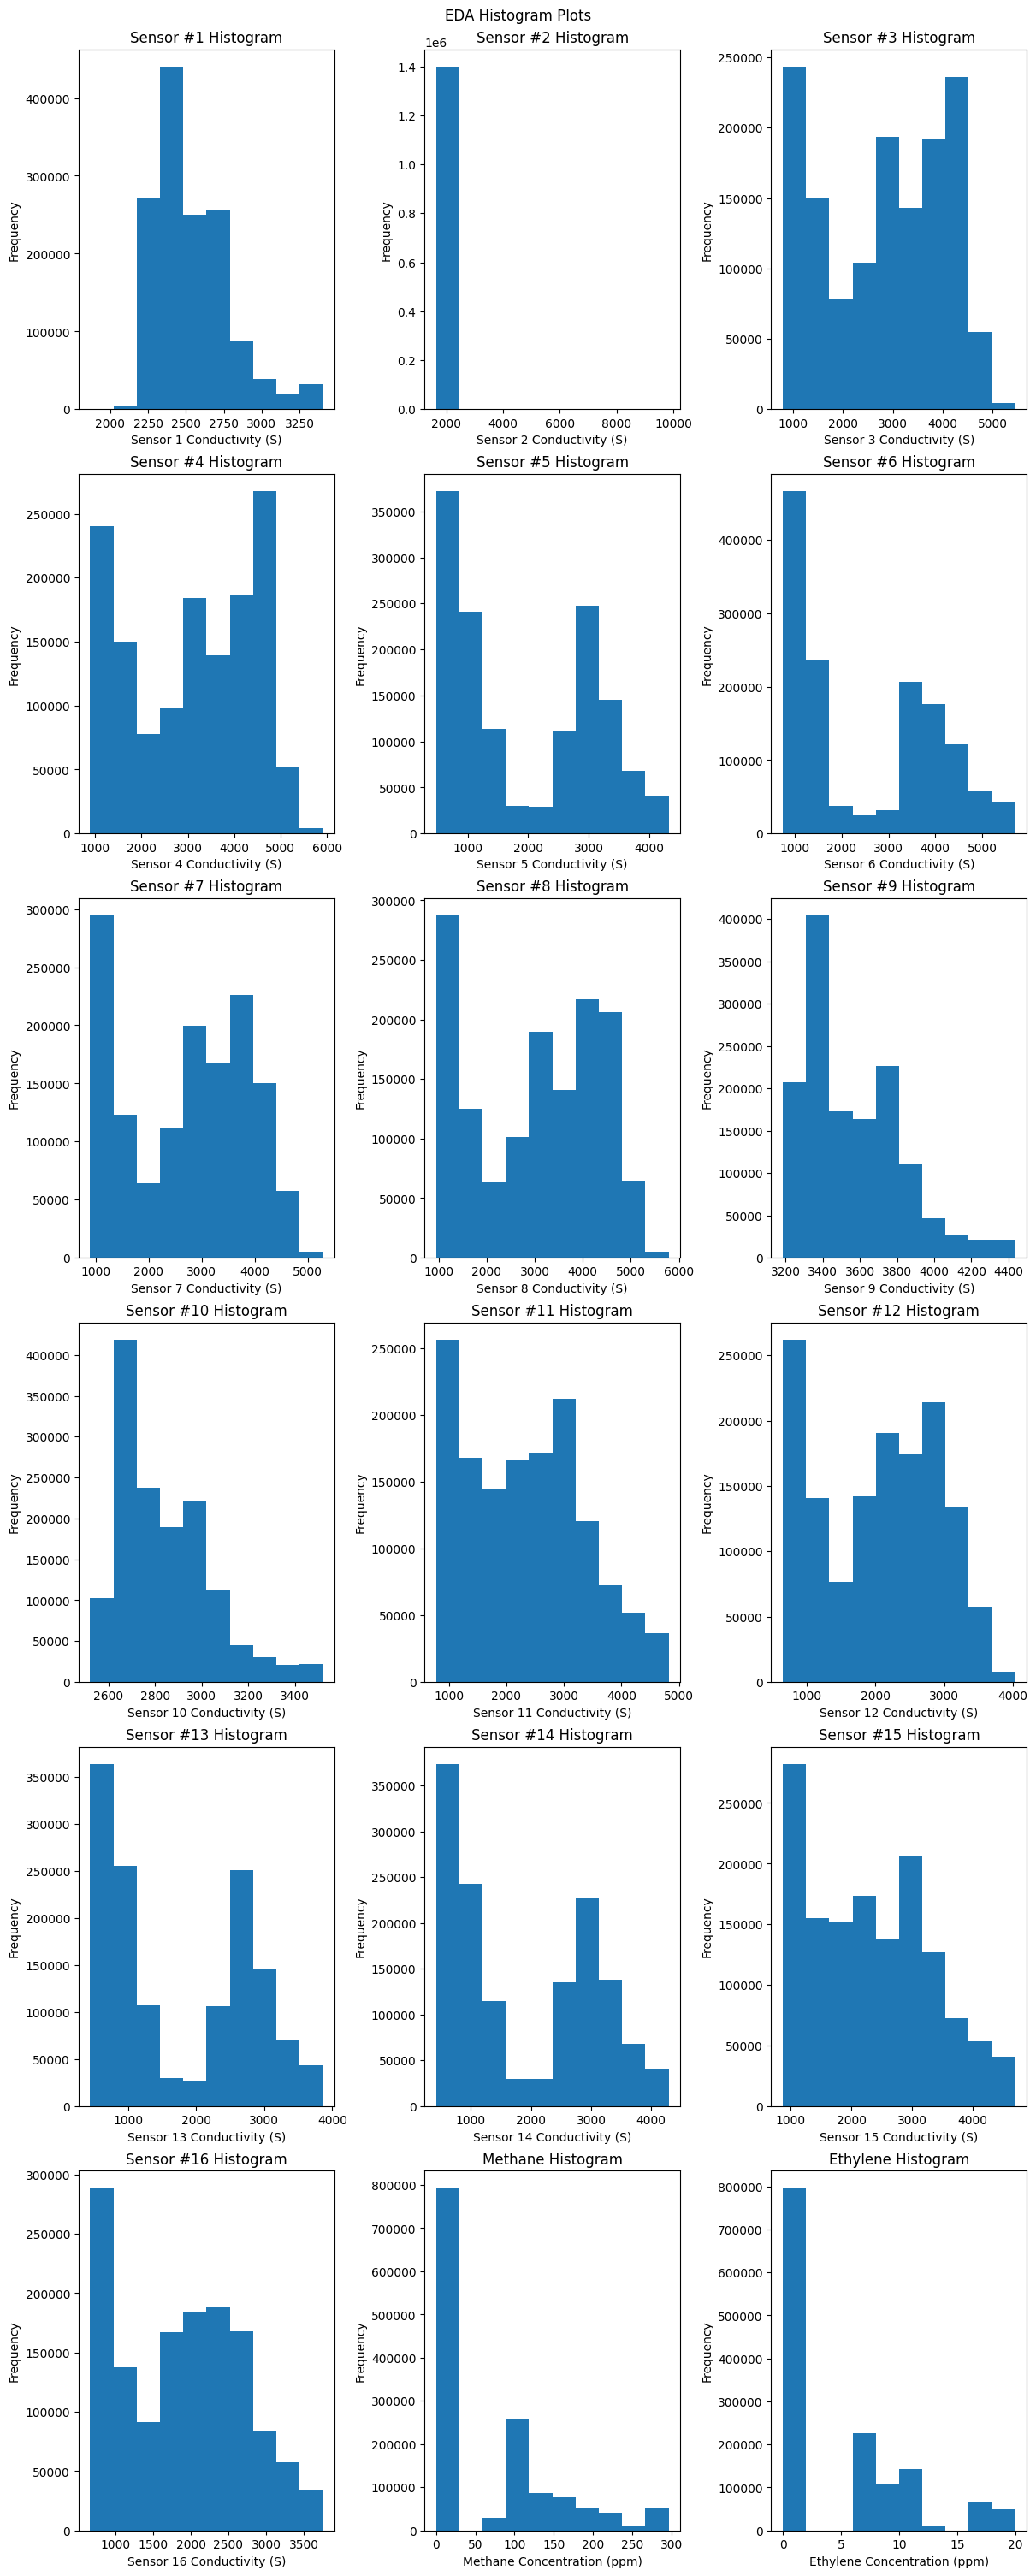

In [65]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, 19):
    ax1 = fig.add_subplot(18//3, 3, i)
    ax1.hist(train_df.iloc[:,i])
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        x_label_string = "Sensor " + x_label_string + " Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < 17:
        ax1.title.set_text("Sensor #" + train_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram") 
plt.show()

In [107]:
import matplotlib
color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

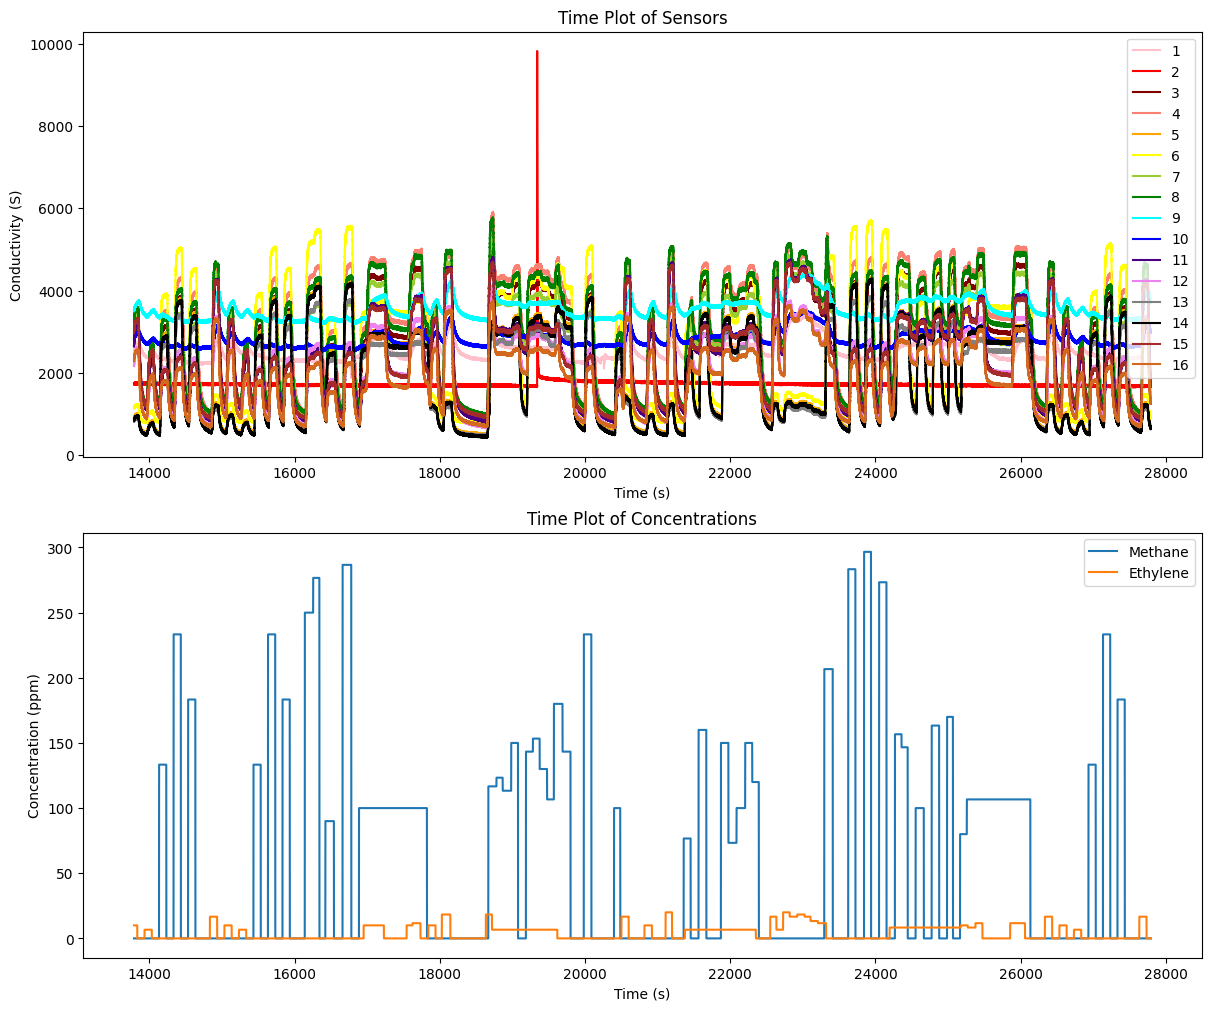

In [77]:
# Plot standard plots (all histograms + a time scatter plot)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

Sensor 2 seems off, let's see the timeplot with just the TGS-2600 sensors:

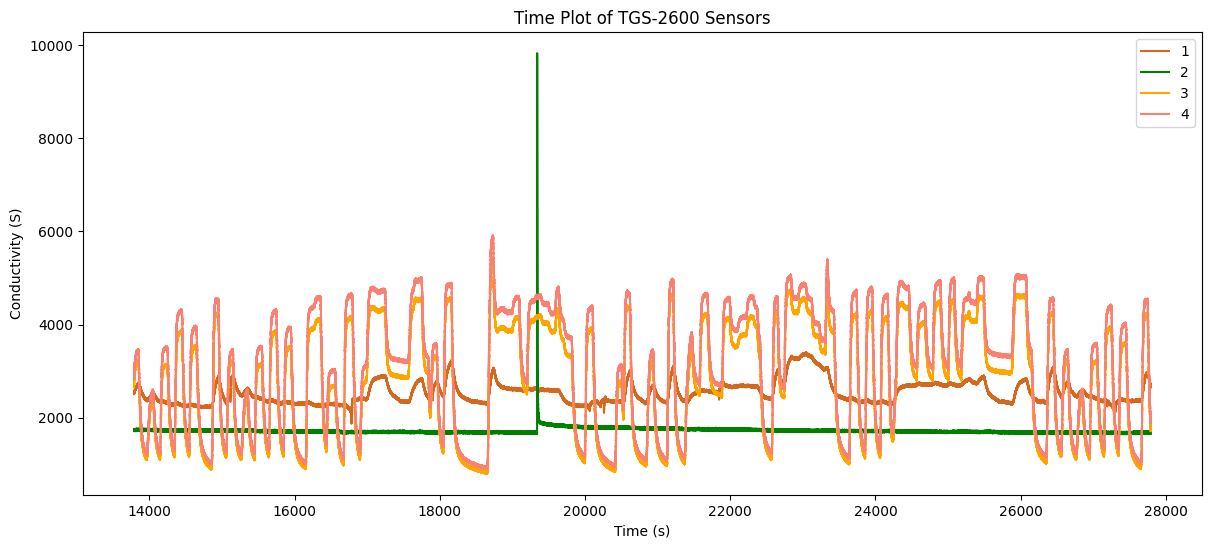

In [75]:
# Plot sensor 2 over time
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots

for i in range(1, 4 + 1):
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[16//i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2600 Sensors") 
        ax_scatter_conduct.legend() 
plt.show()

Sensor 2 is clearly broken. We need to remove it going forward.

In [4]:
# Contain all sensors except sensor 2
good_x_cols = ['Time', '1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
good_sensor_cols = ['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

# Define Metrics Function to easily get metrics

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [6]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, MAPE, and MAE'''
  # Calculate rmse
  rmse = mean_squared_error(actual, predict, squared = False)

  # Calculate mean and range
  mean = np.mean(actual)
  range_val = max(actual) - min(actual)

  # Calculate MAPE and MAE
  mape = mean_absolute_percentage_error(actual, predict)
  mae = mean_absolute_error(actual, predict)
  return (rmse, rmse/mean, rmse/range_val, mape, mae)

# Perform Feature Engieenring

## Get Best Moving Average Window Size

In [7]:
y_meth_train = y_train["Methane"]
y_meth_test = y_test["Methane"]
y_ethy_train = y_train["Ethylene"]
y_ethy_test = y_test["Ethylene"]

In [8]:
meth_moving_average_metrics = []
ethy_moving_average_metrics = []
prev_train_rolling = []
prev_test_rolling = []
lr_meth_models = []
lr_ethy_models = []
# keep track of the best model
best_meth_model = None 
best_meth_model_rmse_div_mean = float("inf")
best_meth_size = -1
best_meth_data = None
best_ethy_model = None 
best_ethy_model_rmse_div_mean = float("inf")
best_ethy_size = -1
best_ethy_data = None

# Loop from window size of 2 to 20.
for i in range(2, 20 + 1):
    print("Checking window of size {}:".format(i))
    lr_meth = LinearRegression(n_jobs = -1)
    lr_ethy = LinearRegression(n_jobs = -1)
    x_train_rolling = x1_train[good_sensor_cols].rolling(i).mean()
    x_test_rolling = x1_test[good_sensor_cols].rolling(i).mean()
    # Fill NaN values - fill with smaller window
    x_train_rolling.iloc[0] = x1_train[good_sensor_cols].iloc[0]
    x_test_rolling.iloc[0] = x1_test[good_sensor_cols].iloc[0]
    prev_train_rolling.append(x_train_rolling.iloc[i - 2])
    prev_test_rolling.append(x_test_rolling.iloc[i - 2])
    # print(x_train_rolling.head(10))
    for j in range(2, i):
        x_train_rolling.iloc[j - 1] = prev_train_rolling[j - 2]
        x_test_rolling.iloc[j - 1] = prev_test_rolling[j - 2]
        
    # Fit the models
    lr_meth_fitted = lr_meth.fit(x_train_rolling, y_meth_train)
    lr_ethy_fitted = lr_ethy.fit(x_train_rolling, y_ethy_train)
    
    # Get predictions
    lr_meth_predictions = lr_meth_fitted.predict(x_test_rolling)
    lr_ethy_predictions = lr_ethy_fitted.predict(x_test_rolling)
    
    # Add the models to a list
    lr_meth_models.append(lr_meth_fitted)
    lr_ethy_models.append(lr_ethy_fitted)
    
    meth_metrics = get_main_metrics(y_meth_test, lr_meth_predictions)
    ethy_metrics = get_main_metrics(y_ethy_test, lr_ethy_predictions)
    meth_moving_average_metrics.append(meth_metrics)
    ethy_moving_average_metrics.append(ethy_metrics)
    print("RMSE/Mean for Methane =", meth_metrics[1])
    print("RMSE/Mean for Ethylene =", ethy_metrics[1])
    
    # Compare best 
    if meth_metrics[1] < best_meth_model_rmse_div_mean:
        best_meth_model_rmse_div_mean = meth_metrics[1]
        best_meth_size = i
        best_meth_model = lr_meth_fitted 
        best_meth_data = [x_train_rolling, x_test_rolling]
    if ethy_metrics[1] < best_ethy_model_rmse_div_mean:
        best_ethy_model_rmse_div_mean = ethy_metrics[1]
        best_ethy_size = i
        best_ethy_model = lr_ethy_fitted 
        best_ethy_data = [x_train_rolling, x_test_rolling]
        
        
print("The best window size for methane is {} with an RMSE/mean = {}".format(best_meth_size, best_meth_model_rmse_div_mean))
print("The best window size for ethylene is {} with an RMSE/mean = {}".format(best_ethy_size, best_ethy_model_rmse_div_mean))

Checking window of size 2:


RMSE/Mean for Methane = 0.8722391719135718
RMSE/Mean for Ethylene = 0.7942400631927343
Checking window of size 3:
RMSE/Mean for Methane = 0.8676908998025397
RMSE/Mean for Ethylene = 0.7901039271063741
Checking window of size 4:
RMSE/Mean for Methane = 0.8655816104982115
RMSE/Mean for Ethylene = 0.7875105038852532
Checking window of size 5:
RMSE/Mean for Methane = 0.864491300057753
RMSE/Mean for Ethylene = 0.7857161798609649
Checking window of size 6:
RMSE/Mean for Methane = 0.8639533380905768
RMSE/Mean for Ethylene = 0.7843990185878646
Checking window of size 7:
RMSE/Mean for Methane = 0.8636874962476732
RMSE/Mean for Ethylene = 0.7833870570915964
Checking window of size 8:
RMSE/Mean for Methane = 0.8635936476757068
RMSE/Mean for Ethylene = 0.782587809807664
Checking window of size 9:
RMSE/Mean for Methane = 0.8636097527972126
RMSE/Mean for Ethylene = 0.7819421455856654
Checking window of size 10:
RMSE/Mean for Methane = 0.8636765805235355
RMSE/Mean for Ethylene = 0.7814134232505233
Ch

In [57]:
# Save the models to be reused
import joblib
joblib.dump(best_meth_model, "models/best_meth_ma_lr.pkl")
joblib.dump(best_ethy_model, "models/best_ethy_ma_lr.pkl")

['models/best_ethy_ma_lr.pkl']

See if HistGradientBoostingRegressor is better than LinearRegression. 

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [55]:
gb_meth_moving_average_metrics = []
gb_ethy_moving_average_metrics = []
gb_prev_train_rolling = []
gb_prev_test_rolling = []
gb_meth_models = []
gb_ethy_models = []
x_cols = ['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
# keep track of the best model
gb_best_meth_model = None 
gb_best_meth_model_rmse_div_mean = float("inf")
gb_best_meth_size = -1
gb_best_ethy_model = None 
gb_best_ethy_model_rmse_div_mean = float("inf")
gb_best_ethy_size = -1

# Loop from window size of 2 to 20.
for i in range(2, 20):
    print("Checking window of size {}:".format(i))
    gb_meth = HistGradientBoostingRegressor()
    gb_ethy = HistGradientBoostingRegressor()
    x_train_rolling = x1_train[x_cols].rolling(i).mean()
    x_test_rolling = x1_test[x_cols].rolling(i).mean()
    # Fill NaN values - fill with smaller window
    x_train_rolling.iloc[0] = x1_train[x_cols].iloc[0]
    x_test_rolling.iloc[0] = x1_test[x_cols].iloc[0]
    gb_prev_train_rolling.append(x_train_rolling.iloc[i - 2])
    gb_prev_test_rolling.append(x_test_rolling.iloc[i - 2])
    # print(x_train_rolling.head(10))
    for j in range(2, i):
        x_train_rolling.iloc[j - 1] = gb_prev_train_rolling[j - 2]
        x_test_rolling.iloc[j - 1] = gb_prev_test_rolling[j - 2]
        
    # Fit the models
    gb_meth_fitted = gb_meth.fit(x_train_rolling, y_meth_train)
    gb_ethy_fitted = gb_ethy.fit(x_train_rolling, y_ethy_train)
    
    # Get predictions
    gb_meth_predictions = gb_meth_fitted.predict(x_test_rolling)
    gb_ethy_predictions = gb_ethy_fitted.predict(x_test_rolling)
    
    # Add the models to a list
    gb_meth_models.append(gb_meth_fitted)
    gb_ethy_models.append(gb_ethy_fitted)
    
    meth_metrics = get_main_metrics(y_meth_test, gb_meth_predictions)
    ethy_metrics = get_main_metrics(y_ethy_test, gb_ethy_predictions)
    gb_meth_moving_average_metrics.append(meth_metrics)
    gb_ethy_moving_average_metrics.append(ethy_metrics)
    print("RMSE/Mean for Methane =", meth_metrics[1])
    print("RMSE/Mean for Ethylene =", ethy_metrics[1])
    
    # Compare best 
    if meth_metrics[1] < gb_best_meth_model_rmse_div_mean:
        gb_best_meth_model_rmse_div_mean = meth_metrics[1]
        gb_best_meth_size = i
        gb_best_meth_model = gb_meth_fitted 
    if ethy_metrics[1] < gb_best_ethy_model_rmse_div_mean:
        gb_best_ethy_model_rmse_div_mean = ethy_metrics[1]
        gb_best_ethy_size = i
        gb_best_ethy_model = gb_ethy_fitted 
        
print("The best window size for methane is {} with an RMSE/mean = {}".format(gb_best_meth_size, gb_best_meth_model_rmse_div_mean))
print("The best window size for ethylene is {} with an RMSE/mean = {}".format(gb_best_ethy_size, gb_best_ethy_model_rmse_div_mean))

Checking window of size 2:
RMSE/Mean for Methane = 0.9857242274391735
RMSE/Mean for Ethylene = 1.0134835559926787
Checking window of size 3:
RMSE/Mean for Methane = 0.9891424818386554
RMSE/Mean for Ethylene = 0.9992408146708129
Checking window of size 4:
RMSE/Mean for Methane = 1.007429729562071
RMSE/Mean for Ethylene = 1.0176466854389963
Checking window of size 5:
RMSE/Mean for Methane = 0.9601254991852438
RMSE/Mean for Ethylene = 0.9928156817471454
Checking window of size 6:
RMSE/Mean for Methane = 0.9801110094224459
RMSE/Mean for Ethylene = 1.0254778656802606
Checking window of size 7:
RMSE/Mean for Methane = 0.9766782796885061
RMSE/Mean for Ethylene = 1.0144042327647758
Checking window of size 8:
RMSE/Mean for Methane = 0.9640085070322587
RMSE/Mean for Ethylene = 1.0321874325380285
Checking window of size 9:
RMSE/Mean for Methane = 0.9735410352792354
RMSE/Mean for Ethylene = 1.033813108518698
Checking window of size 10:
RMSE/Mean for Methane = 0.9600878410814548
RMSE/Mean for Ethyl

As seen, Linear Regression has better results than Hisotgram Gradient Boosting Regressor.

## Get best subset of derivatives

In [9]:
def get_all_subsets(lst):
    subsets = []
    n = len(lst)
    
    # Iterate through 2**n (total number of subsets for a set of size n)
    for i in range(2**n):
        subset = []
        
        for j in range(n):
            # Check if j-th bit in the binary representation of i is set
            if i & (1 << j):
                subset.append(lst[j])
                
        subsets.append(subset)
    return subsets

In [10]:
# Verify subset getter works
deriv_list = [1, 2]
deriv_subsets = get_all_subsets(deriv_list)[1:]
deriv_subsets

[[1], [2], [1, 2]]

In [11]:
# Run Linear Models on all subsets of derivatives, determine which is best
lr_deriv_meth_deriv_metrics = []
lr_deriv_ethy_deriv_metrics = []
lr_deriv_meth_models = []
lr_deriv_ethy_models = []
# keep track of the best model
lr_deriv_best_meth_model = None 
lr_deriv_best_meth_model_rmse_div_mean = float("inf")
lr_deriv_best_meth_size = -1
lr_deriv_best_meth_data = None
lr_deriv_best_ethy_model = None 
lr_deriv_best_ethy_model_rmse_div_mean = float("inf")
lr_deriv_best_ethy_size = -1
lr_deriv_best_ethy_data = None
for i in range(len(deriv_subsets)):
    curr_subset = deriv_subsets[i]
    lr_meth = LinearRegression(n_jobs = -1)
    lr_ethy = LinearRegression(n_jobs = -1)
    deriv_list = []
    max_deriv = max(curr_subset)
    # Go and get the derivatives
    set_derivatives = False
    meth_train_derivatives = None
    ethy_train_derivatives = None
    meth_test_derivatives = None
    ethy_test_derivatives = None
    deriv_col_names = []
    print(curr_subset)
    for j in range(max_deriv):
        curr_deriv = j + 1
        if curr_deriv == 1:
            curr_meth_train_deriv = x1_train[good_sensor_cols].diff(best_meth_size)/best_meth_size
            curr_ethy_train_deriv = x1_train[good_sensor_cols].diff(best_ethy_size)/best_ethy_size
            curr_meth_test_deriv = x1_test[good_sensor_cols].diff(best_meth_size)/best_meth_size
            curr_ethy_test_deriv = x1_test[good_sensor_cols].diff(best_ethy_size)/best_ethy_size
        else:
            curr_meth_train_deriv = curr_meth_train_deriv.diff(best_meth_size)/best_meth_size
            curr_ethy_train_deriv = curr_ethy_train_deriv.diff(best_ethy_size)/best_ethy_size
            curr_meth_test_deriv = curr_meth_test_deriv.diff(best_meth_size)/best_meth_size
            curr_ethy_test_deriv = curr_ethy_test_deriv.diff(best_ethy_size)/best_ethy_size
        if curr_deriv in curr_subset:
            # Get the column names 
            curr_deriv_col_names = ["d{}_".format(curr_deriv) + c_name for c_name in good_sensor_cols]
            deriv_col_names = deriv_col_names + curr_deriv_col_names
            
            if set_derivatives:
                # concatenate the derivative dataframes
                meth_train_derivatives = pd.concat([meth_train_derivatives, curr_meth_train_deriv], axis = 1)
                ethy_train_derivatives = pd.concat([ethy_train_derivatives, curr_ethy_train_deriv], axis = 1)
                meth_test_derivatives = pd.concat([meth_test_derivatives, curr_meth_test_deriv], axis = 1)
                ethy_test_derivatives = pd.concat([ethy_test_derivatives, curr_ethy_test_deriv], axis = 1)
            else: 
                meth_train_derivatives = curr_meth_train_deriv
                ethy_train_derivatives = curr_ethy_train_deriv
                meth_test_derivatives = curr_meth_test_deriv
                ethy_test_derivatives = curr_ethy_test_deriv
                set_derivatives = True
    # Create dataframes out of the derivative subsets
    meth_train_derivatives.columns = deriv_col_names
    ethy_train_derivatives.columns = deriv_col_names
    meth_test_derivatives.columns = deriv_col_names
    ethy_test_derivatives.columns = deriv_col_names
    # Replace NaN's with vales up ahead
    meth_train_derivatives = meth_train_derivatives.bfill()
    ethy_train_derivatives = ethy_train_derivatives.bfill()
    meth_test_derivatives = meth_test_derivatives.bfill()
    ethy_test_derivatives = ethy_test_derivatives.bfill()
    # Go and run linear regression now
    # Fit the models
    lr_meth.fit(meth_train_derivatives, y_meth_train)
    lr_ethy.fit(ethy_train_derivatives, y_ethy_train)
    # print(meth_train_derivatives.columns)
    # print(meth_test_derivatives.columns)
    # print(lr_deriv_meth_fitted.feature_names_in_)
    # Get predictions
    lr_deriv_meth_predictions = lr_meth.predict(meth_test_derivatives)
    lr_deriv_ethy_predictions = lr_ethy.predict(ethy_test_derivatives)
    
    # Add the models to a list
    lr_deriv_meth_models.append(lr_meth)
    lr_deriv_ethy_models.append(lr_ethy)
    
    meth_metrics = get_main_metrics(y_meth_test, lr_deriv_meth_predictions)
    ethy_metrics = get_main_metrics(y_ethy_test, lr_deriv_ethy_predictions)
    lr_deriv_meth_deriv_metrics.append(meth_metrics)
    lr_deriv_ethy_deriv_metrics.append(ethy_metrics)
    print("RMSE/Mean for Methane =", meth_metrics[1])
    print("RMSE/Mean for Ethylene =", ethy_metrics[1])
    
    # Compare best 
    if meth_metrics[1] < lr_deriv_best_meth_model_rmse_div_mean:
        lr_deriv_best_meth_model_rmse_div_mean = meth_metrics[1]
        lr_deriv_best_meth_size = curr_subset
        lr_deriv_best_meth_model = lr_meth 
        lr_deriv_best_meth_data = [meth_train_derivatives, meth_test_derivatives]
    if ethy_metrics[1] < lr_deriv_best_ethy_model_rmse_div_mean:
        lr_deriv_best_ethy_model_rmse_div_mean = ethy_metrics[1]
        lr_deriv_best_ethy_size = curr_subset
        lr_deriv_best_ethy_model = lr_ethy 
        lr_deriv_best_ethy_data = [ethy_train_derivatives, ethy_test_derivatives]
        
        
print("The best derivatives for methane are {} with an RMSE/mean = {}".format(lr_deriv_best_meth_size, lr_deriv_best_meth_model_rmse_div_mean))
print("The best derivatives for ethylene are {} with an RMSE/mean = {}".format(lr_deriv_best_ethy_size, lr_deriv_best_ethy_model_rmse_div_mean))

[1]


RMSE/Mean for Methane = 1.5477742494120368
RMSE/Mean for Ethylene = 1.2608577977580668
[2]
RMSE/Mean for Methane = 1.5656134693613937
RMSE/Mean for Ethylene = 1.306757345668772
[1, 2]
RMSE/Mean for Methane = 1.5215351825641663
RMSE/Mean for Ethylene = 1.2318383716545527
The best derivatives for methane are [1, 2] with an RMSE/mean = 1.5215351825641663
The best derivatives for ethylene are [1, 2] with an RMSE/mean = 1.2318383716545527


# Merge moving averages and derivatives into dataframes

In [12]:
x1_meth_train_fe = pd.concat([x1_train, best_meth_data[0], lr_deriv_best_meth_data[0]], axis = 1)
x1_ethy_train_fe = pd.concat([x1_train, best_ethy_data[0], lr_deriv_best_meth_data[0]], axis = 1)
x1_meth_test_fe = pd.concat([x1_test, best_meth_data[1], lr_deriv_best_meth_data[1]], axis = 1)
x1_ethy_test_fe = pd.concat([x1_test, best_ethy_data[1], lr_deriv_best_ethy_data[1]], axis = 1)


In [13]:
# Verify concat worked
x1_meth_train_fe.head(10)

,Time,1,2,3,4,5,6,7,8,9,...,d2_7,d2_8,d2_9,d2_10,d2_11,d2_12,d2_13,d2_14,d2_15,d2_16
1378906,13789.59,2523.95,1729.67,2656.04,2837.44,903.28,1156.10,3067.06,3225.99,3525.00,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378907,13789.60,2511.71,1728.77,2657.08,2849.52,905.80,1149.42,3043.20,3222.57,3528.57,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378908,13789.61,2523.19,1735.94,2654.47,2835.83,890.14,1145.17,3055.12,3258.52,3508.34,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378909,13789.62,2530.34,1746.04,2664.91,2842.54,901.15,1141.94,3059.84,3219.73,3514.29,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378910,13789.63,2517.06,1729.67,2669.87,2840.13,900.96,1141.13,3051.79,3231.97,3534.53,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378911,13789.64,2518.85,1728.55,2659.43,2836.91,911.42,1151.24,3053.45,3217.45,3508.94,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378912,13789.65,2516.55,1719.38,2650.57,2841.74,902.12,1141.13,3068.73,3222.86,3527.38,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378913,13789.66,2532.13,1741.10,2664.91,2842.81,901.54,1153.06,3079.02,3232.25,3523.81,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378914,13789.67,2517.83,1718.48,2660.73,2844.96,905.41,1143.76,3050.68,3225.99,3520.23,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781
1378915,13789.68,2511.45,1732.13,2661.25,2842.81,905.99,1143.96,3056.23,3234.82,3536.02,...,0.49875,0.200313,-0.194688,-0.426406,-0.154687,0.2075,0.095313,0.020938,0.558125,-0.130781


In [15]:
x1_meth_test_fe.head(10)

,Time,1,2,3,4,5,6,7,8,9,...,d2_7,d2_8,d2_9,d2_10,d2_11,d2_12,d2_13,d2_14,d2_15,d2_16
2778705,27791.52,2665.69,1673.28,1726.76,1893.61,698.80,928.11,1656.23,1746.49,3709.39,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778706,27791.53,2656.82,1672.62,1719.60,1889.47,682.43,912.77,1662.87,1742.45,3725.31,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778707,27791.54,2664.12,1680.39,1719.60,1891.54,680.20,917.43,1674.62,1747.83,3699.30,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778708,27791.55,2642.76,1691.94,1724.07,1888.54,688.94,910.45,1661.54,1755.48,3727.16,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778709,27791.56,2653.95,1674.17,1719.82,1894.53,695.45,920.92,1682.83,1749.18,3711.23,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778710,27791.57,2674.31,1685.27,1723.85,1904.67,697.68,927.13,1661.98,1749.41,3715.51,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778711,27791.58,2660.99,1679.50,1716.25,1882.80,686.15,915.49,1666.19,1755.70,3729.30,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778712,27791.59,2654.73,1672.62,1721.61,1893.61,688.01,912.00,1659.55,1745.81,3735.44,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778713,27791.60,2667.00,1677.72,1710.89,1885.33,691.73,931.41,1670.62,1743.34,3721.64,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625
2778714,27791.61,2661.51,1679.28,1715.35,1890.85,690.42,919.75,1666.19,1746.71,3710.92,...,-0.439219,0.014219,-0.244062,0.03875,0.247187,-0.059219,-0.074688,-0.319688,-0.374531,0.270625


# Perform robust scaling

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
# Create scaler
robust_meth_scaler = RobustScaler()
robust_ethy_scaler = RobustScaler()

In [16]:
# First, train all the data on the scalers
robust_meth_scaler.fit(x1_meth_train_fe, y_train)
robust_ethy_scaler.fit(x1_ethy_train_fe, y_train)

RobustScaler()

In [17]:
# Second, transform all the train data on the fitted scalers
x_meth_train_fe_robust = robust_meth_scaler.transform(x1_meth_train_fe)
x_ethy_train_fe_robust = robust_ethy_scaler.transform(x1_ethy_train_fe)

In [18]:
# Third, transform all the test data on the fitted scalers
x_meth_test_fe_robust = robust_meth_scaler.transform(x1_meth_test_fe)
x_ethy_test_fe_robust = robust_ethy_scaler.transform(x1_ethy_test_fe)

# Perform Power Transformer on Data 

In [19]:
from sklearn.preprocessing import PowerTransformer

In [20]:
# Create transformers
meth_power_transformer = PowerTransformer()
ethy_power_transformer = PowerTransformer()

In [21]:
# First, train all the data on the transformers
meth_power_transformer.fit(x_meth_train_fe_robust, y_train)
ethy_power_transformer.fit(x_ethy_train_fe_robust, y_train)

PowerTransformer()

In [22]:
# Second, transform all the train data on the fitted scalers
x_meth_train_ferp = meth_power_transformer.transform(x_meth_train_fe_robust)
x_ethy_train_ferp = ethy_power_transformer.transform(x_ethy_train_fe_robust)

In [23]:
# Third, transform all the test data on the fitted scalers
x_meth_test_ferp = meth_power_transformer.transform(x_meth_test_fe_robust)
x_ethy_test_ferp = ethy_power_transformer.transform(x_ethy_test_fe_robust)

# Perform Principal Component Analysis (PCA)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca_meth = PCA(n_components=62)
pca_meth.fit(x_meth_train_ferp)
pca_ethy = PCA(n_components=62)
pca_ethy.fit(x_ethy_train_ferp)

PCA(n_components=62)

In [30]:
import seaborn as sns

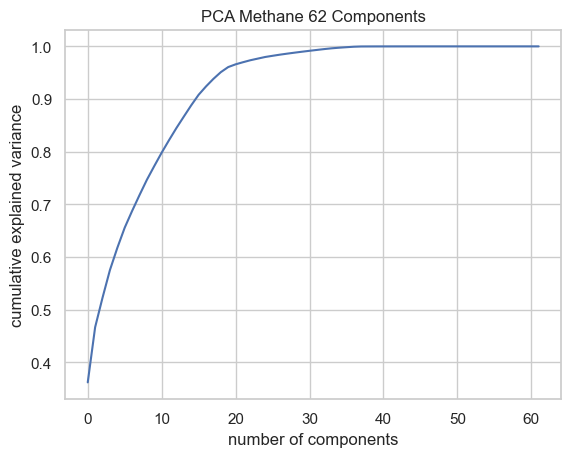

None

In [47]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane 62 Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

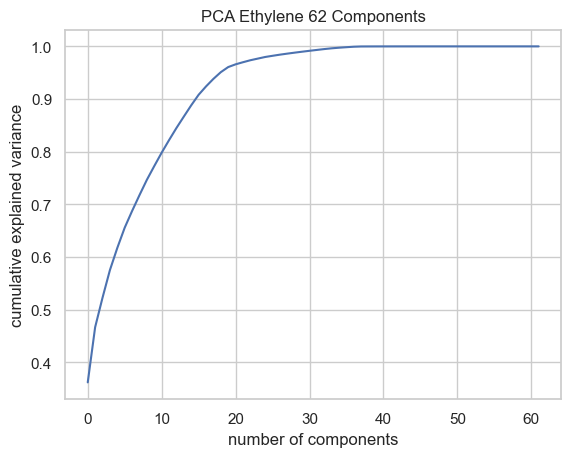

None

In [48]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene 62 Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [26]:
pca_meth_best = PCA(n_components=0.95)
pca_meth_best.fit(x_meth_train_ferp)
pca_ethy_best = PCA(n_components=0.95)
pca_ethy_best.fit(x_ethy_train_ferp)

PCA(n_components=0.95)

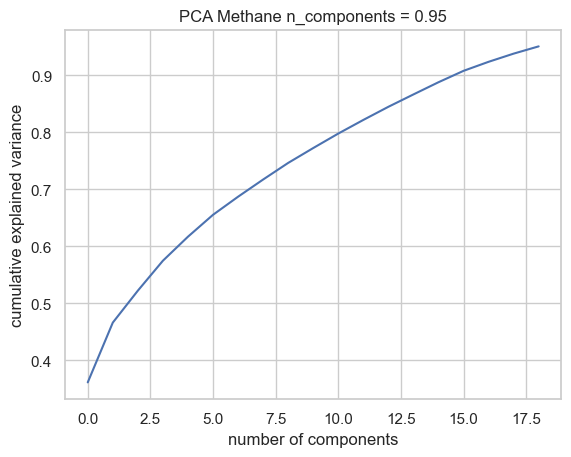

None

In [50]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

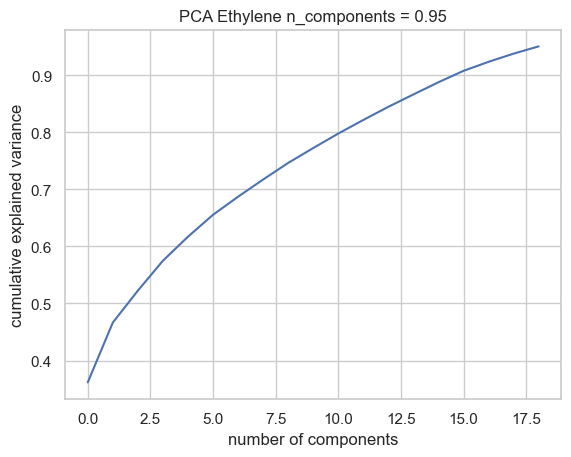

None

In [53]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [ ]:
# Fit the PCA on the data

In [27]:
x_meth_train_preprocessed = pca_meth_best.transform(x_meth_train_ferp)
x_ethy_train_preprocessed = pca_ethy_best.transform(x_ethy_train_ferp)
x_meth_test_preprocessed = pca_meth_best.transform(x_meth_test_ferp)
x_ethy_test_preprocessed = pca_ethy_best.transform(x_ethy_test_ferp)

In [56]:
x_meth_train_preprocessed.shape

(1399799, 19)

# Redo EDA on PCA Features

In [111]:
x_meth_train_preprocessed.shape

(1399799, 19)

In [117]:
meth_train_preprocessed = pd.concat([pd.DataFrame(x_meth_train_preprocessed), pd.DataFrame(y_meth_train).reset_index(drop = True)], axis = 1)
ethy_train_preprocessed = pd.concat([pd.DataFrame(x_ethy_train_preprocessed), pd.DataFrame(y_ethy_train).reset_index(drop = True)], axis = 1)

In [118]:
meth_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Methane
0,-0.401496,-2.290924,-0.392000,-0.392133,0.240997,0.335348,0.526821,-0.222688,-0.512934,0.051577,-0.333043,0.067242,-0.086808,-2.087254,-1.076781,-0.067248,-0.320163,0.999104,-0.480299,0.0
1,-0.404543,-2.296777,-0.391124,-0.392343,0.240285,0.334889,0.526689,-0.222011,-0.513361,0.051990,-0.331853,0.067159,-0.089165,-2.074488,-1.072836,-0.067853,-0.320621,1.004449,-0.481270,0.0
2,-0.431823,-2.272714,-0.393315,-0.392043,0.242873,0.340187,0.526675,-0.227508,-0.510810,0.051728,-0.339038,0.064745,-0.076048,-2.175411,-1.105475,-0.062952,-0.320016,0.959299,-0.475235,0.0
3,-0.405669,-2.279335,-0.394532,-0.390775,0.245433,0.344498,0.526507,-0.232425,-0.508062,0.054029,-0.344279,0.062587,-0.063339,-2.274149,-1.142752,-0.057977,-0.317851,0.842926,-0.462369,0.0
4,-0.405624,-2.310549,-0.391514,-0.391987,0.240664,0.335788,0.526911,-0.222781,-0.512624,0.051660,-0.332695,0.067200,-0.087309,-2.088258,-1.076797,-0.067270,-0.320019,0.998472,-0.480110,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399794,-3.311343,-3.570596,2.220152,2.143929,1.238289,-0.034255,2.577407,-0.069122,1.821767,-0.031647,0.316504,1.775491,-1.554483,1.886582,1.900936,-0.297599,0.180918,-0.585088,1.283918,0.0
1399795,-3.297211,-3.531442,0.444627,1.963524,-0.287567,0.258448,1.516347,1.443884,1.511012,-1.088381,-1.623624,1.770488,-0.500794,3.096059,1.320357,-1.090790,-1.900836,0.137276,0.564992,0.0
1399796,-3.316868,-3.608601,0.192743,-0.128883,-0.773089,-3.129130,0.454802,0.458597,2.000130,-0.413648,2.083839,1.777258,-1.935709,1.889346,1.320385,0.561166,1.697164,-0.514661,0.263566,0.0
1399797,-3.329311,-3.526817,-2.250130,-1.298286,0.564134,-2.765021,-0.767551,1.441153,-0.650110,-3.681489,0.359889,2.974164,-0.733955,2.247366,1.166746,-0.664410,0.419399,-0.349134,-0.216819,0.0


In [113]:
meth_train_preprocessed.shape

(2778705, 20)

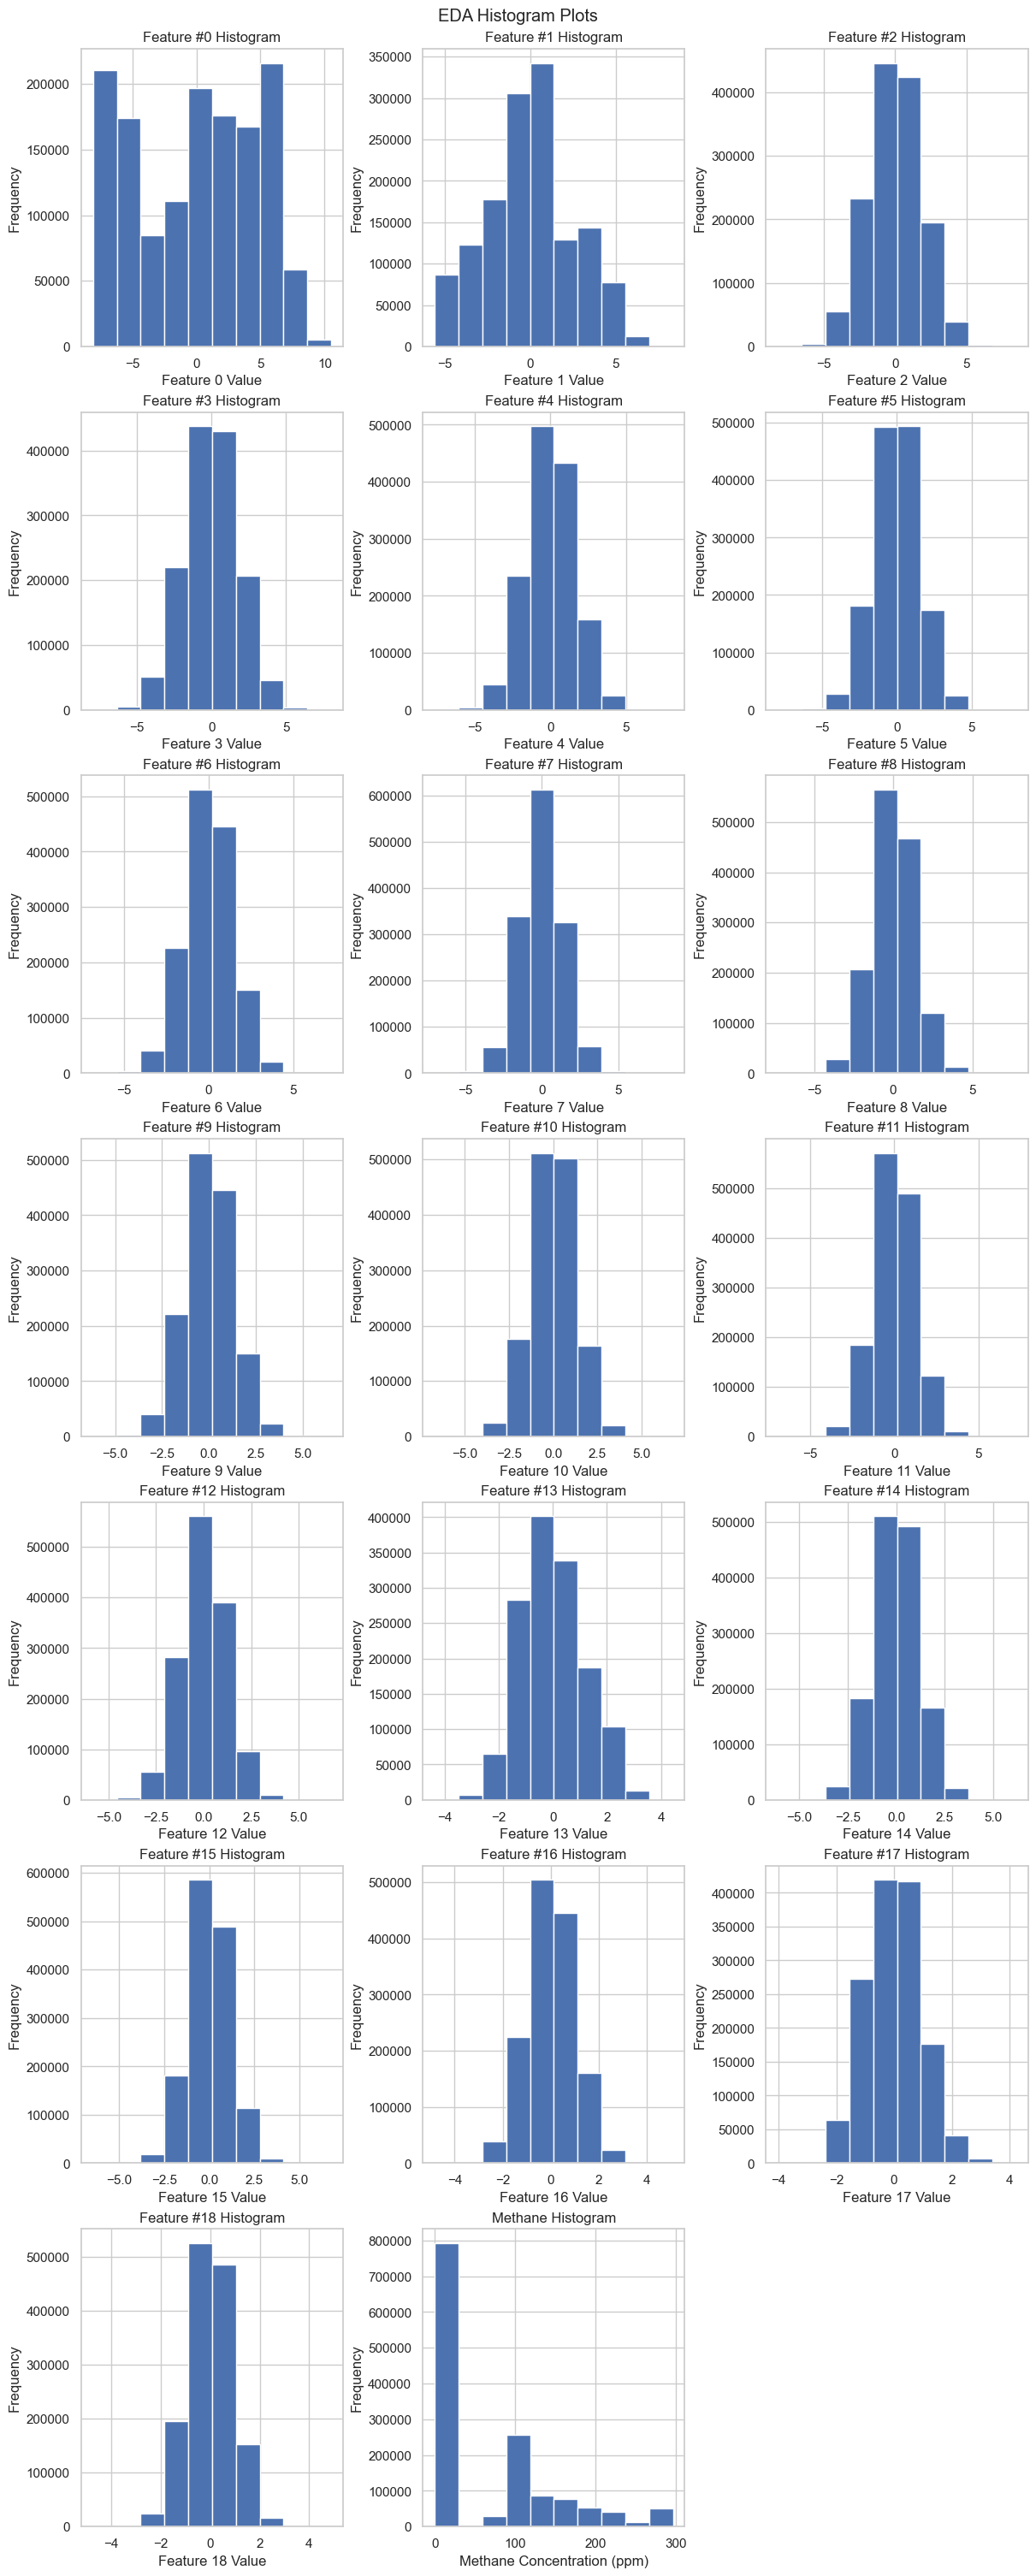

In [119]:
# Plot standard plots (all histograms + a time scatter plot) 
# Do Methane
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
num_features = len(meth_train_preprocessed.columns)
for i in range(0, num_features):
    ax1 = fig.add_subplot(num_features//3 + 1, 3, i + 1)
    ax1.hist(meth_train_preprocessed.iloc[:,i])
    x_label_string = meth_train_preprocessed.iloc[:,i].name
    if i < num_features - 1:
        x_label_string = "Feature " + str(x_label_string) + " Value"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < num_features - 1:
        ax1.title.set_text("Feature #" + str(meth_train_preprocessed.iloc[:,i].name) + " Histogram")
    else:
        ax1.title.set_text(str(meth_train_preprocessed.iloc[:,i].name) + " Histogram") 
plt.show()

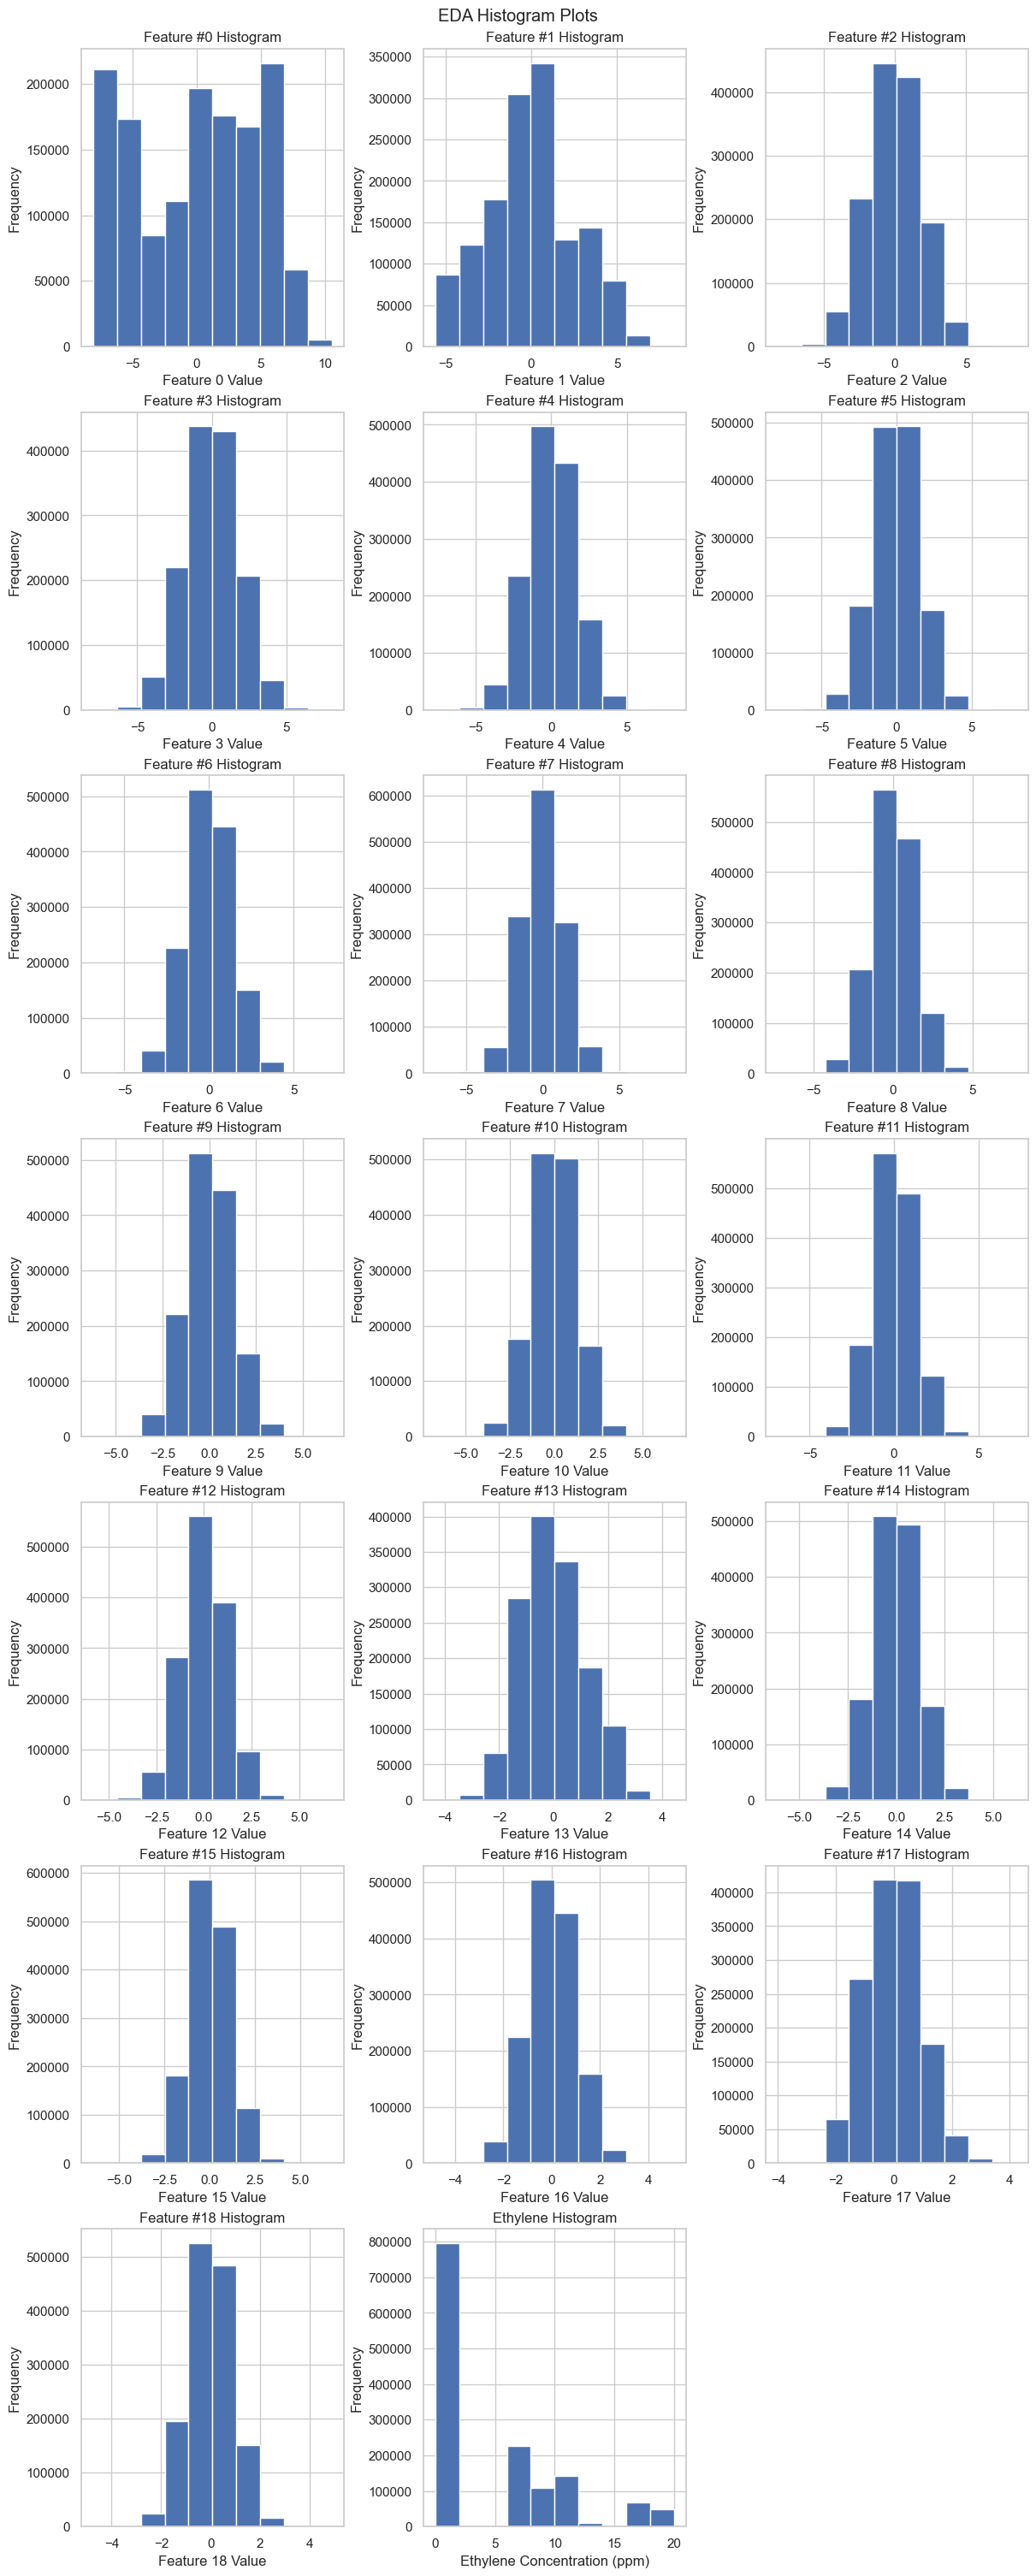

In [120]:
# Do Ethylene
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
num_features = len(ethy_train_preprocessed.columns)
for i in range(0, num_features):
    ax1 = fig.add_subplot(num_features//3 + 1, 3, i + 1)
    ax1.hist(ethy_train_preprocessed.iloc[:,i])
    x_label_string = ethy_train_preprocessed.iloc[:,i].name
    if i < num_features - 1:
        x_label_string = "Feature " + str(x_label_string) + " Value"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < num_features - 1:
        ax1.title.set_text("Feature #" + str(ethy_train_preprocessed.iloc[:,i].name) + " Histogram")
    else:
        ax1.title.set_text(str(ethy_train_preprocessed.iloc[:,i].name) + " Histogram") 
plt.show()

In [109]:
train_df.shape

(1399799, 19)

In [110]:
meth_train_preprocessed.shape()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Methane
0,-0.401496,-2.290924,-0.392000,-0.392133,0.240997,0.335348,0.526821,-0.222688,-0.512934,0.051577,-0.333043,0.067242,-0.086808,-2.087254,-1.076781,-0.067248,-0.320163,0.999104,-0.480299,NaN
1,-0.404543,-2.296777,-0.391124,-0.392343,0.240285,0.334889,0.526689,-0.222011,-0.513361,0.051990,-0.331853,0.067159,-0.089165,-2.074488,-1.072836,-0.067853,-0.320621,1.004449,-0.481270,NaN
2,-0.431823,-2.272714,-0.393315,-0.392043,0.242873,0.340187,0.526675,-0.227508,-0.510810,0.051728,-0.339038,0.064745,-0.076048,-2.175411,-1.105475,-0.062952,-0.320016,0.959299,-0.475235,NaN
3,-0.405669,-2.279335,-0.394532,-0.390775,0.245433,0.344498,0.526507,-0.232425,-0.508062,0.054029,-0.344279,0.062587,-0.063339,-2.274149,-1.142752,-0.057977,-0.317851,0.842926,-0.462369,NaN
4,-0.405624,-2.310549,-0.391514,-0.391987,0.240664,0.335788,0.526911,-0.222781,-0.512624,0.051660,-0.332695,0.067200,-0.087309,-2.088258,-1.076797,-0.067270,-0.320019,0.998472,-0.480110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2778701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2778702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2778703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


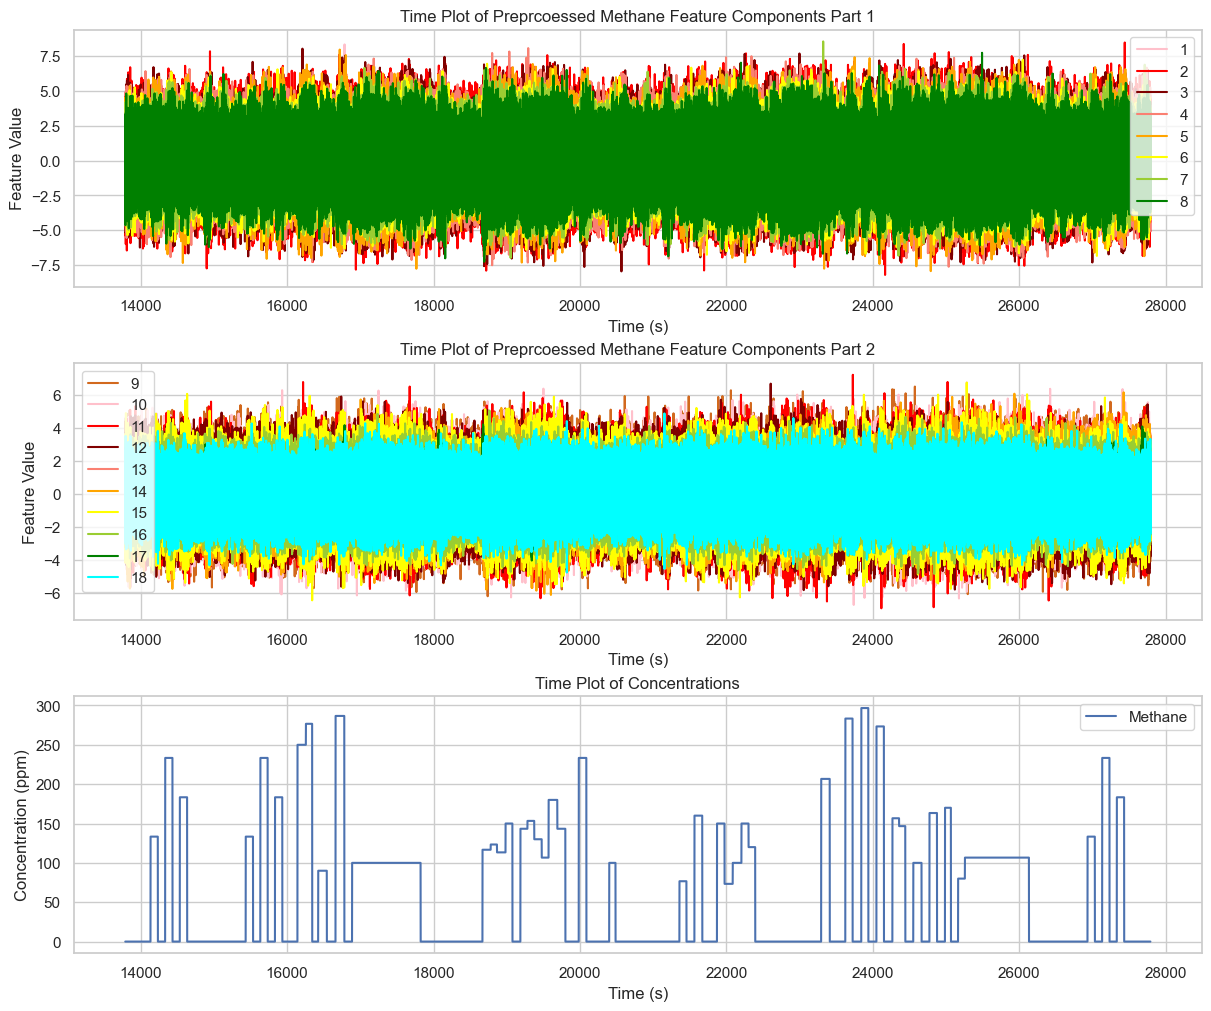

In [122]:
# Plot standard plots (all histograms + a time scatter plot)
# Do Methane
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(3, 1, 1)
ax_scatter_conduct_2 = fig_conduct.add_subplot(3, 1, 2)
ax_scatter_concentration = fig_conduct.add_subplot(3, 1, 3)
# Cycler for conductivity plots
num_features = len(meth_train_preprocessed.columns)
for i in range(1, num_features):
    x_label_string = meth_train_preprocessed.iloc[:,i].name
    if i < (num_features - 1)//2:
        ax_scatter_conduct.plot(train_df.iloc[:,0], meth_train_preprocessed.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Feature Value")
        ax_scatter_conduct.title.set_text("Time Plot of Preprcoessed Methane Feature Components Part 1") 
        ax_scatter_conduct.legend() 
    elif i < num_features - 1:
        ax_scatter_conduct_2.plot(train_df.iloc[:,0], meth_train_preprocessed.iloc[:,i], label = x_label_string, color = colors[i - (num_features - 1)//2 - 1])
        ax_scatter_conduct_2.legend()
        ax_scatter_conduct_2.set_xlabel("Time (s)")
        ax_scatter_conduct_2.set_ylabel("Feature Value")
        ax_scatter_conduct_2.title.set_text("Time Plot of Preprcoessed Methane Feature Components Part 2") 
        ax_scatter_conduct_2.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], meth_train_preprocessed.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


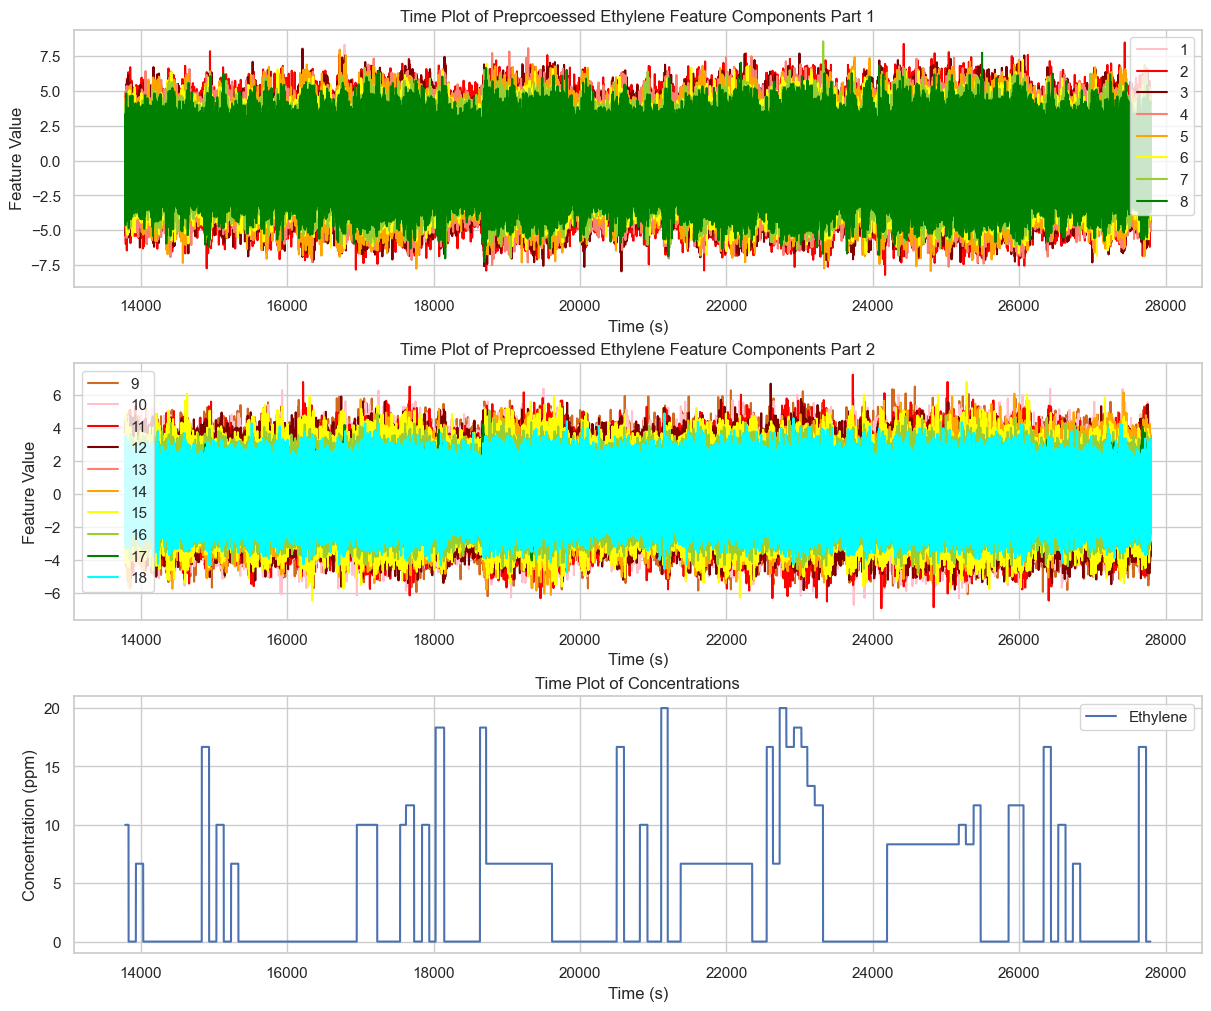

In [123]:
# Plot standard plots (all histograms + a time scatter plot)
# Do Ethylene
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(3, 1, 1)
ax_scatter_conduct_2 = fig_conduct.add_subplot(3, 1, 2)
ax_scatter_concentration = fig_conduct.add_subplot(3, 1, 3)
# Cycler for conductivity plots
num_features = len(ethy_train_preprocessed.columns)
for i in range(1, num_features):
    x_label_string = ethy_train_preprocessed.iloc[:,i].name
    if i < (num_features - 1)//2:
        ax_scatter_conduct.plot(train_df.iloc[:,0], ethy_train_preprocessed.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Feature Value")
        ax_scatter_conduct.title.set_text("Time Plot of Preprcoessed Ethylene Feature Components Part 1") 
        ax_scatter_conduct.legend() 
    elif i < num_features - 1:
        ax_scatter_conduct_2.plot(train_df.iloc[:,0], ethy_train_preprocessed.iloc[:,i], label = x_label_string, color = colors[i - (num_features - 1)//2 - 1])
        ax_scatter_conduct_2.legend()
        ax_scatter_conduct_2.set_xlabel("Time (s)")
        ax_scatter_conduct_2.set_ylabel("Feature Value")
        ax_scatter_conduct_2.title.set_text("Time Plot of Preprcoessed Ethylene Feature Components Part 2") 
        ax_scatter_conduct_2.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], ethy_train_preprocessed.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

# Define GridSearchCV Helper Functions

In [28]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [29]:
def optimize_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using GridSearchCV"""
  try:
    grid = GridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [30]:
def optimize_randomized_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using RandomSearchCV"""
  try:
    grid = RandomizedSearchCV(estimator= model,
                      param_distributions = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

In [93]:

class MAD_Adder():
    '''Adds a Moving Average and Derivatives'''
    def __init__(self, min_window = 2, max_window = 20, max_deriv = 2, debug = True):
        self.min_window = min_window
        self.max_window = max_window
        self.max_deriv = max_deriv
        self.debug = debug 
    
    def get_best_ma_window(self, x_train, y_train, x_test, y_test):
        moving_average_metrics = []
        prev_train_rolling = []
        prev_test_rolling = []
        lr_models = []
        # keep track of the best model
        best_model = None 
        best_model_rmse_div_mean = float("inf")
        best_size = -1
        best_data = None

        # Loop from window size of 2 to 20.
        for i in range(self.min_window, self.max_window + 1):
            if self.debug:
                print("Checking window of size {}:".format(i))
            lr = LinearRegression(n_jobs = -1)
            x_train_rolling = x_train.rolling(i).mean()
            x_test_rolling = x_test.rolling(i).mean()
            # Fill NaN values - fill with smaller window
            x_train_rolling.iloc[0] = x_train.iloc[0]
            x_test_rolling.iloc[0] = x_test.iloc[0]
            prev_train_rolling.append(x_train_rolling.iloc[i - 2])
            prev_test_rolling.append(x_test_rolling.iloc[i - 2])
            # print(x_train_rolling.head(10))
            for j in range(2, i):
                x_train_rolling.iloc[j - 1] = prev_train_rolling[j - 2]
                x_test_rolling.iloc[j - 1] = prev_test_rolling[j - 2]
                
            # Fit the models
            lr.fit(x_train_rolling, y_train)
            
            # Get predictions
            lr_predictions = lr.predict(x_test_rolling)
            
            # Add the models to a list
            lr_models.append(lr)
            
            metrics = get_main_metrics(y_test, lr_predictions)
            moving_average_metrics.append(metrics)
            if self.debug:
                print("RMSE/Mean =", metrics[1])
            
            # Compare best 
            if metrics[1] < best_model_rmse_div_mean:
                best_model_rmse_div_mean = metrics[1]
                best_size = i
                best_model = lr
                best_data = [x_train_rolling, x_test_rolling]
        
        
        if self.debug:
            print("The best window size is {} with an RMSE/mean = {}".format(best_size, best_model_rmse_div_mean))
        return (best_model, best_data, best_model_rmse_div_mean, best_size)
    
    def get_all_subsets(self, lst):
        subsets = []
        n = len(lst)
        
        # Iterate through 2**n (total number of subsets for a set of size n)
        for i in range(2**n):
            subset = []
            
            for j in range(n):
                # Check if j-th bit in the binary representation of i is set
                if i & (1 << j):
                    subset.append(lst[j])
                    
            subsets.append(subset)
        return subsets
    
    def get_best_derivatives(self, window_size, x_train, y_train, x_test, y_test):
        deriv_list = [i + 1 for i in range(self.max_deriv)]
        deriv_subsets = get_all_subsets(deriv_list)[1:]
        lr_deriv_metrics = []
        lr_deriv_models = []
        # keep track of the best model
        lr_deriv_best_model = None 
        lr_deriv_best_model_rmse_div_mean = float("inf")
        lr_deriv_best_size = -1
        lr_deriv_best_data = None
        for i in range(len(deriv_subsets)):
            curr_subset = deriv_subsets[i]
            lr = LinearRegression(n_jobs = -1)
            deriv_list = []
            max_deriv = max(curr_subset)
            # Go and get the derivatives
            set_derivatives = False
            train_derivatives = None
            test_derivatives = None
            deriv_col_names = []
            if self.debug:
                print(curr_subset)
            for j in range(max_deriv):
                curr_deriv = j + 1
                if curr_deriv == 1:
                    curr_train_deriv = x_train[good_sensor_cols].diff(window_size)/window_size
                    curr_test_deriv = x_test[good_sensor_cols].diff(window_size)/window_size
                else:
                    curr_train_deriv = curr_train_deriv.diff(window_size)/window_size
                    curr_test_deriv = curr_test_deriv.diff(window_size)/window_size
                if curr_deriv in curr_subset:
                    # Get the column names 
                    curr_deriv_col_names = ["d{}_".format(curr_deriv) + c_name for c_name in good_sensor_cols]
                    deriv_col_names = deriv_col_names + curr_deriv_col_names
                    
                    if set_derivatives:
                        # concatenate the derivative dataframes
                        train_derivatives = pd.concat([train_derivatives, curr_train_deriv], axis = 1)
                        test_derivatives = pd.concat([test_derivatives, curr_test_deriv], axis = 1)
                    else: 
                        train_derivatives = curr_train_deriv
                        test_derivatives = curr_test_deriv
                        set_derivatives = True
            # Create dataframes out of the derivative subsets
            train_derivatives.columns = deriv_col_names
            test_derivatives.columns = deriv_col_names
            # Replace NaN's with vales up ahead
            train_derivatives = train_derivatives.bfill()
            test_derivatives = test_derivatives.bfill()
            # Go and run linear regression now
            # Fit the models
            lr.fit(train_derivatives, y_train)
            # print(meth_train_derivatives.columns)
            # print(meth_test_derivatives.columns)
            # print(lr_deriv_meth_fitted.feature_names_in_)
            # Get predictions
            lr_deriv_predictions = lr.predict(test_derivatives)
            
            # Add the models to a list
            lr_deriv_models.append(lr)
            
            metrics = get_main_metrics(y_test, lr_deriv_predictions)
            lr_deriv_metrics.append(metrics)
            if self.debug == True:
                print("RMSE/Mean =", metrics[1])

            
            # Compare best 
            if metrics[1] < lr_deriv_best_model_rmse_div_mean:
                lr_deriv_best_model_rmse_div_mean = metrics[1]
                lr_deriv_best_size = curr_subset
                lr_deriv_best_model = lr
                lr_deriv_best_data = [train_derivatives, test_derivatives]
                
        if self.debug:
            print("The best derivatives are {} with an RMSE/mean = {}".format(lr_deriv_best_size, lr_deriv_best_model_rmse_div_mean))
        return (lr_deriv_best_model, lr_deriv_best_data, lr_deriv_best_model_rmse_div_mean, lr_deriv_best_size)
    
    def get_mad_features(self, x_train, y_train, x_test, y_test):
        '''Gets moving average and derivative features'''
        ma_features = self.get_best_ma_window(x_train, y_train, x_test, y_test)
        best_window = ma_features[3]
        d_features = self.get_best_derivatives(best_window, x_train, y_train, x_test, y_test)
        return (ma_features, d_features)
        
    def append_mad_features(self, x_train, y_train, x_test, y_test):
        '''Appends moving average and derivative features to train and test sets'''
        mad_features = self.get_mad_features(x_train, y_train, x_test, y_test)
        ma_features = mad_features[0]
        d_features = mad_features[1]
        ma_data = ma_features[1]
        d_data = d_features[1]
        new_x_train = pd.concat([x_train, ma_data[0], d_data[0]], axis=1)
        new_x_test = pd.concat([x_test, ma_data[1], d_data[1]], axis=1)
        return (new_x_train, new_x_test, mad_features)
        
        


In [75]:
x1_train[good_sensor_cols]

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1378906,2523.95,2656.04,2837.44,903.28,1156.10,3067.06,3225.99,3525.00,2810.94,2650.57,2166.82,819.19,863.95,3002.35,2298.08
1378907,2511.71,2657.08,2849.52,905.80,1149.42,3043.20,3222.57,3528.57,2820.83,2641.98,2166.58,816.90,854.55,2973.25,2324.73
1378908,2523.19,2654.47,2835.83,890.14,1145.17,3055.12,3258.52,3508.34,2802.40,2650.83,2191.20,817.47,837.89,2961.48,2291.44
1378909,2530.34,2664.91,2842.54,901.15,1141.94,3059.84,3219.73,3514.29,2800.53,2660.47,2194.59,831.20,861.26,3004.55,2306.71
1378910,2517.06,2669.87,2840.13,900.96,1141.13,3051.79,3231.97,3534.53,2813.88,2656.30,2163.93,798.27,856.47,2991.63,2300.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778700,2659.17,1710.44,1886.47,678.90,911.03,1662.65,1753.23,3745.27,2971.88,1771.92,1359.48,642.83,658.71,1681.94,1252.95
2778701,2667.00,1720.49,1892.00,685.96,917.43,1664.64,1748.28,3724.40,2980.65,1759.75,1355.70,647.26,656.68,1686.16,1252.34
2778702,2648.48,1705.31,1891.54,699.17,922.86,1644.97,1743.57,3739.13,2992.73,1768.54,1359.48,638.78,655.75,1664.64,1251.92
2778703,2664.65,1720.72,1912.52,691.73,914.32,1659.99,1750.53,3710.00,2971.06,1781.40,1357.80,650.76,643.20,1660.66,1260.17


In [94]:
MADA = MAD_Adder()

In [80]:

MADA.get_best_ma_window(x1_train[good_sensor_cols], y_meth_train, x1_test[good_sensor_cols], y_meth_test)

Checking window of size 2:
RMSE/Mean = 0.8722391719135718
Checking window of size 3:
RMSE/Mean = 0.8676908998025397
Checking window of size 4:
RMSE/Mean = 0.8655816104982115
Checking window of size 5:
RMSE/Mean = 0.864491300057753
Checking window of size 6:
RMSE/Mean = 0.8639533380905768
Checking window of size 7:
RMSE/Mean = 0.8636874962476732
Checking window of size 8:
RMSE/Mean = 0.8635936476757068
Checking window of size 9:
RMSE/Mean = 0.8636097527972126
Checking window of size 10:
RMSE/Mean = 0.8636765805235355
Checking window of size 11:
RMSE/Mean = 0.8637868565652019
Checking window of size 12:
RMSE/Mean = 0.8639189565880427
Checking window of size 13:
RMSE/Mean = 0.8640706910105088
Checking window of size 14:
RMSE/Mean = 0.8642306818435395
Checking window of size 15:
RMSE/Mean = 0.8643925441964674
Checking window of size 16:
RMSE/Mean = 0.8645599867073577
Checking window of size 17:
RMSE/Mean = 0.8647265823873795
Checking window of size 18:
RMSE/Mean = 0.8648941310865428
Checki

(LinearRegression(n_jobs=-1),
 [                  1           3           4          5           6  \
  1378906  2523.95000  2656.04000  2837.44000  903.28000  1156.10000   
  1378907  2523.95000  2656.04000  2837.44000  903.28000  1156.10000   
  1378908  2523.95000  2656.04000  2837.44000  903.28000  1156.10000   
  1378909  2523.95000  2656.04000  2837.44000  903.28000  1156.10000   
  1378910  2523.95000  2656.04000  2837.44000  903.28000  1156.10000   
  ...             ...         ...         ...        ...         ...   
  2778700  2660.96000  1725.51875  1899.89000  688.19750   914.59500   
  2778701  2661.48250  1726.41250  1899.66000  687.68625   914.01375   
  2778702  2659.85375  1723.42375  1899.31500  689.40750   916.09750   
  2778703  2660.80000  1720.06250  1900.32500  691.79875   916.96875   
  2778704  2660.86500  1716.28250  1898.19375  690.49625   915.12625   
  
                    7          8           9          10          11  \
  1378906  3067.06000  3225.990

In [92]:
MADA.get_best_derivatives(8, x1_train[good_sensor_cols], y_meth_train, x1_test[good_sensor_cols], y_meth_test)

[1]
RMSE/Mean = 1.5477742494120368
[2]
RMSE/Mean = 1.5656134693613937
[1, 2]
RMSE/Mean = 1.5215351825641663
The best derivatives are [1, 2] with an RMSE/mean = 1.5215351825641663


(LinearRegression(n_jobs=-1),
 [            d1_1     d1_3     d1_4     d1_5     d1_6     d1_7    d1_8  \
  1378906 -0.76500  0.58625  0.94000  0.26625 -1.54250 -2.04750  0.0000   
  1378907 -0.76500  0.58625  0.94000  0.26625 -1.54250 -2.04750  0.0000   
  1378908 -0.76500  0.58625  0.94000  0.26625 -1.54250 -2.04750  0.0000   
  1378909 -0.76500  0.58625  0.94000  0.26625 -1.54250 -2.04750  0.0000   
  1378910 -0.76500  0.58625  0.94000  0.26625 -1.54250 -2.04750  0.0000   
  ...          ...      ...      ...      ...      ...      ...     ...   
  2778700 -0.97875 -0.92125 -1.61250 -1.55625 -0.55750 -0.30375  0.1125   
  2778701  0.52250  0.89375 -0.23000 -0.51125 -0.58125 -1.55250 -0.6750   
  2778702 -1.62875 -2.98875 -0.34500  1.72125  2.08375 -1.87750 -1.4600   
  2778703  0.94625 -3.36125  1.01000  2.39125  0.87125 -0.99625 -0.3375   
  2778704  0.06500 -3.78000 -2.13125 -1.30250 -1.84250  0.91250  1.3750   
  
              d1_9    d1_10    d1_11  ...      d2_7      d2_8      

In [95]:
# Get train and test x sets with rolling average and derivative features
mad_meth_data = MADA.append_mad_features(x1_train[good_sensor_cols], y_meth_train, x1_test[good_sensor_cols], y_meth_test)
print(mad_meth_data[0].head(10), mad_meth_data[1].head(10))

Checking window of size 2:
RMSE/Mean = 0.8722391719135718
Checking window of size 3:
RMSE/Mean = 0.8676908998025397
Checking window of size 4:
RMSE/Mean = 0.8655816104982115
Checking window of size 5:
RMSE/Mean = 0.864491300057753
Checking window of size 6:
RMSE/Mean = 0.8639533380905768
Checking window of size 7:
RMSE/Mean = 0.8636874962476732
Checking window of size 8:
RMSE/Mean = 0.8635936476757068
Checking window of size 9:
RMSE/Mean = 0.8636097527972126
Checking window of size 10:
RMSE/Mean = 0.8636765805235355
Checking window of size 11:
RMSE/Mean = 0.8637868565652019
Checking window of size 12:
RMSE/Mean = 0.8639189565880427
Checking window of size 13:
RMSE/Mean = 0.8640706910105088
Checking window of size 14:
RMSE/Mean = 0.8642306818435395
Checking window of size 15:
RMSE/Mean = 0.8643925441964674
Checking window of size 16:
RMSE/Mean = 0.8645599867073577
Checking window of size 17:
RMSE/Mean = 0.8647265823873795
Checking window of size 18:
RMSE/Mean = 0.8648941310865428
Checki

In [32]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [33]:
def optimize_halving_pipeline(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [37]:
model_collections = {}

In [38]:
model_collections

{}

# Run Linear SVR

In [35]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [40]:
linear_svr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0, 0.1, 1],
    'verbose': [1],
}

In [48]:
optim_lsvr_meth = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train.values, x_meth_test_preprocessed, y_meth_test.values)
print(optim_lsvr_meth[2:])
model_collections["optim_lsvr_meth"] = optim_lsvr_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 155533
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 155533
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 466599
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 1399797
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(array([-10.37619517, -11.02128447,  -8.23412088, ...,   0.69760372,
        -4.66102465,  -4.48491647]), (51.1561983188047, 1.1479762131828237, 0.18270070828144536, 8.904313984158245e+16, 34.67171336346648), {'C': 10, 'epsilon': 1, 'verbose': 1}, -57.07232127841157)


In [41]:
optim_lsvr_ethy = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train.values, x_ethy_test_preprocessed, y_ethy_test.values)
print(optim_lsvr_ethy[2:])
model_collections["optim_lsvr_ethy"] = optim_lsvr_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 155533
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 155533
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 466599
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 1399797
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear](array([ 3.95312657,  3.96727729,  3.80716171, ..., -0.38834896,
        0.18977648, -0.07244781]), (4.422949093594913, 1.030111730078667, 0.24129564067620915, 7251002558966305.0, 2.7649861892550036), {'C': 0.01, 'epsilon': 0.1, 'verbose': 1}, -4.313772982184157)


In [47]:
# Save the models to be reused
import joblib
joblib.dump(optim_lsvr_ethy, "models/best_ethy_lsvr_v2.pkl")

['models/best_ethy_lsvr_v2.pkl']

In [49]:
joblib.dump(optim_lsvr_meth, "models/best_meth_lsvr_v2.pkl")

['models/best_meth_lsvr_v2.pkl']

# Run Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
gradient_boosting_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [30, 40, 50, 60, 70, 80, 90],
    'loss': ["huber"],
    'max_depth': [2, 3, 4],
    'max_features': [3, 4, 5, 6],
}

In [52]:
optim_gbr_meth = optimize_halving_model(GradientBoostingRegressor(), gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train.values, x_meth_test_preprocessed, y_meth_test.values)
print(optim_gbr_meth[2:])
model_collections["optim_gbr_meth"] = optim_gbr_meth

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 5760
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 5760
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 1
n_candidates: 84
n_resources: 17280
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 2
n_candidates: 28
n_resources: 51840
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 10
n_resources: 155520
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 4
n_resources: 466560
Fitting 5 folds for each of 4 candidates, totalling 20 fits
(array([-0.26022448,  2.46105974, -1.29532051, ..., 16.4670663 ,
       22.74961764, 16.60124467]), (46.838644691373574, 1.0510876830277167, 0.16728087389776278, 5.3884220468941416e+16, 28.947504453456002), {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, '

In [53]:
joblib.dump(optim_gbr_meth, "models/best_meth_gbr_v2.pkl")

['models/best_meth_gbr_v2.pkl']

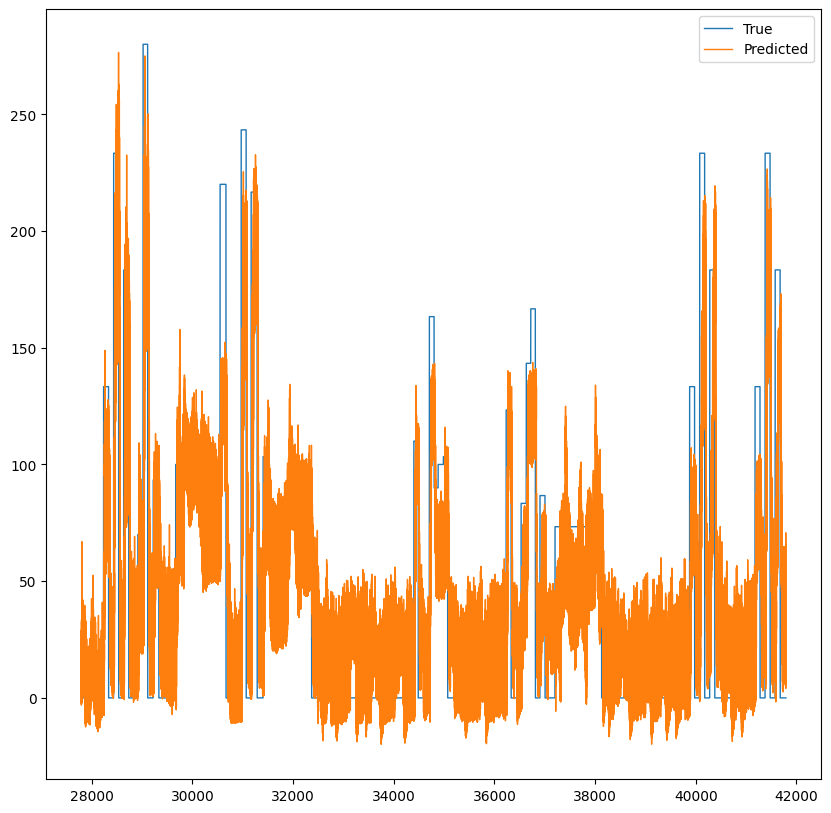

In [56]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, optim_gbr_meth[2], label = "Predicted",linewidth=1)
plt.legend()

In [54]:
optim_gbr_ethy = optimize_halving_model(GradientBoostingRegressor(), gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train.values, x_ethy_test_preprocessed, y_ethy_test.values)
print(optim_gbr_ethy[2:])
model_collections["optim_gbr_ethy"] = optim_gbr_ethy

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 5760
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 5760
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 1
n_candidates: 84
n_resources: 17280
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 2
n_candidates: 28
n_resources: 51840
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 10
n_resources: 155520
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 4
n_resources: 466560
Fitting 5 folds for each of 4 candidates, totalling 20 fits
(array([1.70429679, 1.70429679, 0.78103639, ..., 1.85994272, 2.12523245,
       1.89115254]), (4.430996457416679, 1.0319859736418626, 0.24173466761684012, 9736749665752138.0, 3.471503924644392), {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 2, 'max_features

In [57]:
joblib.dump(optim_gbr_ethy, "models/best_ethy_gbr_v2.pkl")

['models/best_ethy_gbr_v2.pkl']

In [67]:
ls_meth_predictions = optim_lsvr_meth[0].predict(x_meth_test_preprocessed)
get_main_metrics(y_meth_test.values, ls_meth_predictions)

(49.90690629415097,
 1.1199413400930793,
 0.1782389510505392,
 8.335722022357723e+16,
 33.27558616979536)

In [127]:
optim_lsvr_ethy = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train.values, x_ethy_test_preprocessed, y_ethy_test.values)
print(optim_lsvr_ethy[2:])
model_collections["optim_lsvr_ethy"] = optim_lsvr_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 155533
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 155533
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 1
n_candidates: 9
n_resources: 466599
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 1399797
Fitting 5 folds for each of 3 candidates, totalling 15 fits
['A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.\n']


In [59]:
optim_lsvr_meth[3]

(51.1561983188047,
 1.1479762131828237,
 0.18270070828144536,
 8.904313984158245e+16,
 34.67171336346648)

In [64]:
model_collections.keys()

dict_keys(['optim_lsvr_ethy', 'optim_lsvr_meth', 'optim_gbr_meth', 'optim_gbr_ethy'])

In [65]:
model_collections = {
    'optim_lsvr_meth': optim_lsvr_meth,
    'optim_lsvr_ethy': optim_lsvr_ethy,
    'optim_gbr_meth': optim_gbr_meth,
    'optim_gbr_ethy': optim_gbr_ethy
}

# Plot Results

C:\Users\jacob\AppData\Local\Temp\ipykernel_38388\3335752449.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_38388\3335752449.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_38388\3335752449.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_38388\3335752449.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_38388\3335752449.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)


Text(0.5, 1.0, 'MAE of Hypertuned Models')

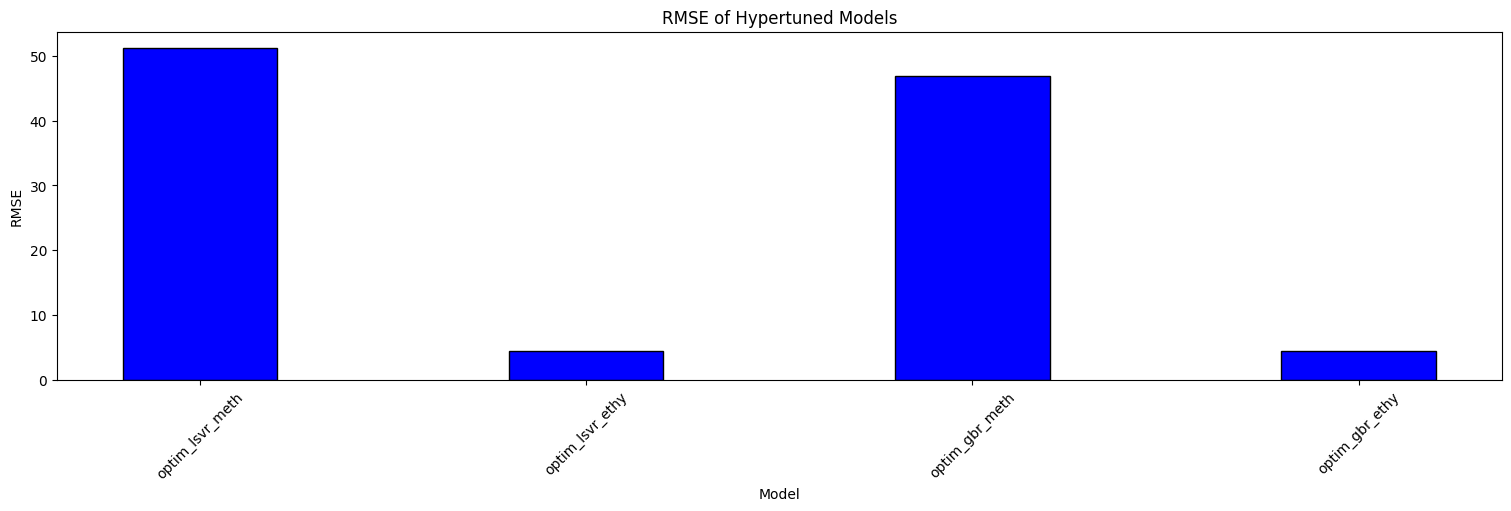

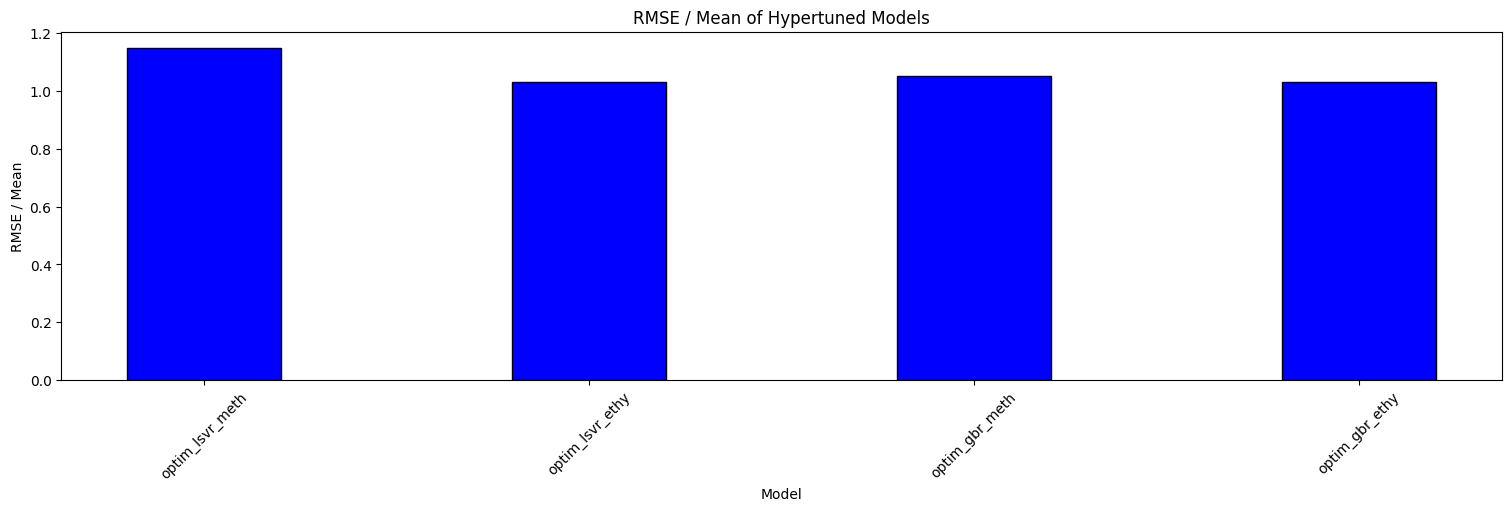

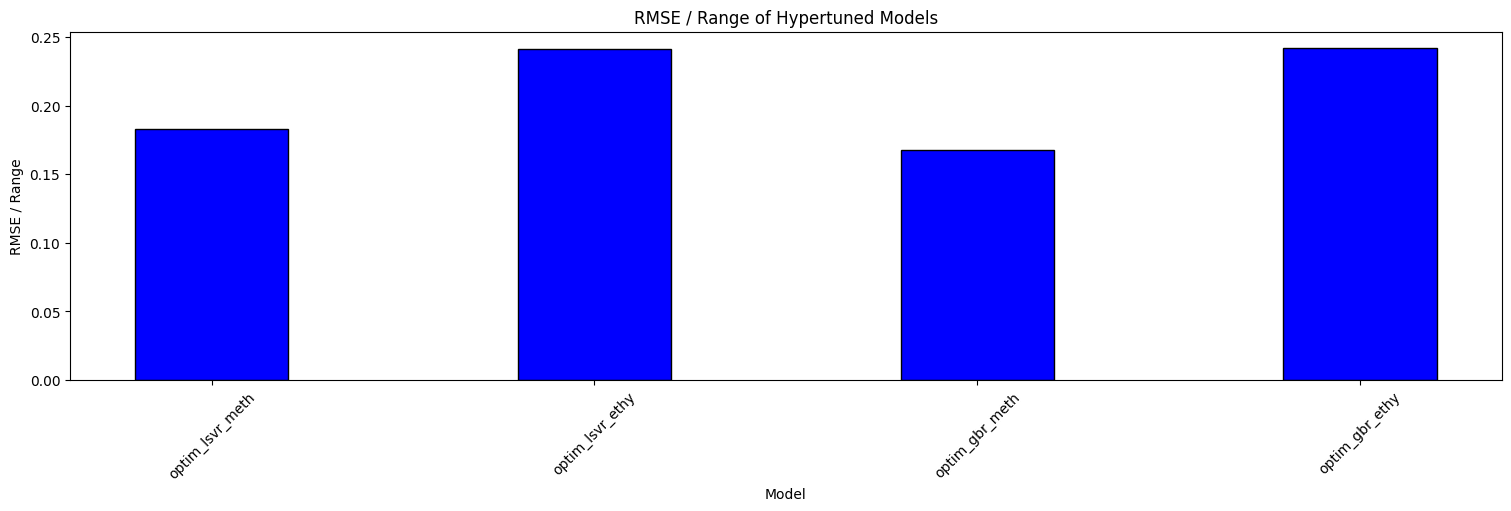

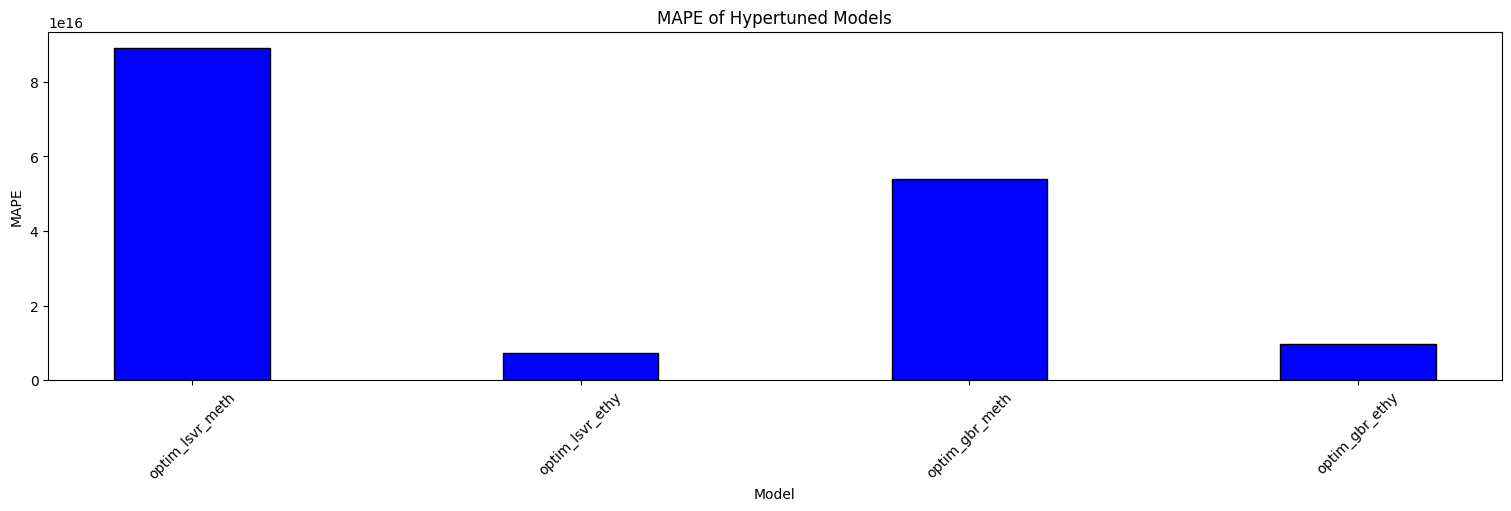

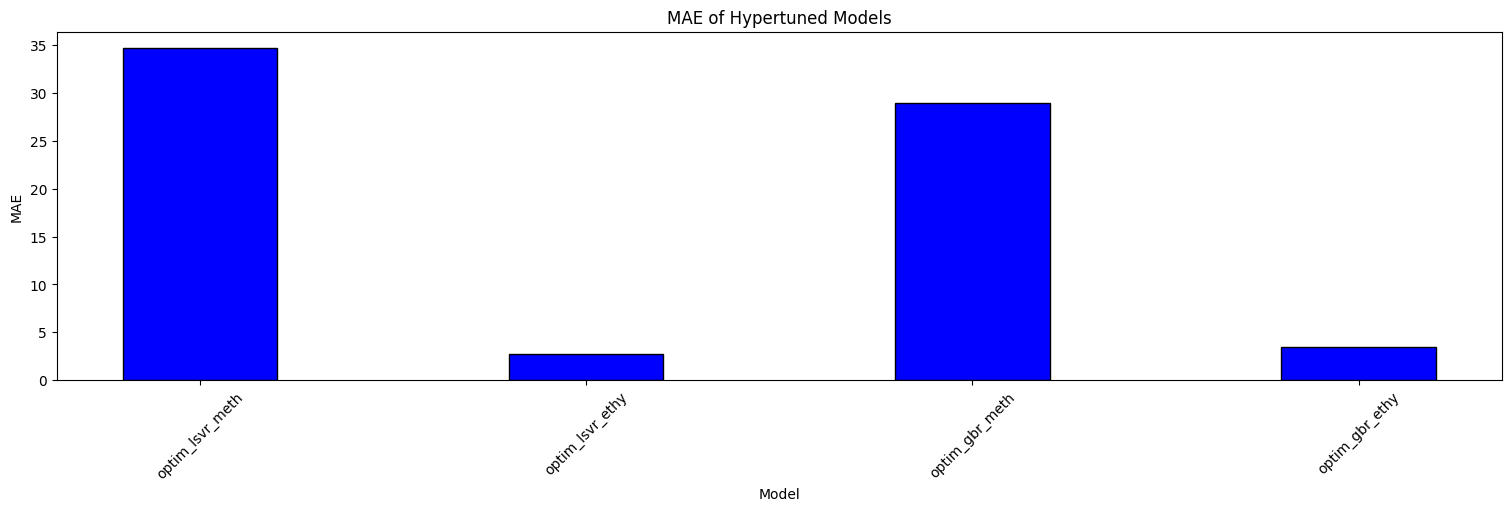

In [66]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
rmses = [model_collections[label][3][0] for label in best_model_labels]

rmses_div_mean = [model_collections[label][3][1] for label in best_model_labels]
rmses_div_range = [model_collections[label][3][2] for label in best_model_labels]
mapes = [model_collections[label][3][3] for label in best_model_labels]
maes = [model_collections[label][3][4] for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Model")
ax1.set_title("RMSE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_mean, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Mean")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Mean of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_range, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Range")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Range of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, mapes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.set_title("MAPE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, maes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAE")
ax1.set_xlabel("Model")
ax1.set_title("MAE of Hypertuned Models")

In [68]:
# Print the best results (rmse, rmse/mean, rmse/range, mape)
for label in best_model_labels:
    print(label)
    for i in range(4):
        print("{:.4f}".format(model_collections[label][3][i]), end = ",\n")
    print("\n")

optim_lsvr_meth
51.1562,
1.1480,
0.1827,
89043139841582448.0000,


optim_lsvr_ethy
4.4229,
1.0301,
0.2413,
7251002558966305.0000,


optim_gbr_meth
46.8386,
1.0511,
0.1673,
53884220468941416.0000,


optim_gbr_ethy
4.4310,
1.0320,
0.2417,
9736749665752138.0000,




In [70]:
# Store residuals and predictions
predictions = []
residuals = []
for i in range(len(model_collections)):
    curr_best_model_label = list(best_model_labels)[i]
    curr_best_model_data = model_collections[curr_best_model_label]
    y_predictions = curr_best_model_data[2]
    # y_predictions = best_model_collections[i][1]
    predictions.append(y_predictions)
    # print(y_predictions.shape, len(y_predictions))
    # print(curr_y_test.shape, len(curr_y_test))
    # if len(y_predictions) > 100000:
    #   print(y_predictions, y_residuals)
    curr_y_test = curr_best_model_data[1]
    y_residuals = curr_y_test - y_predictions
    residuals.append(y_residuals)

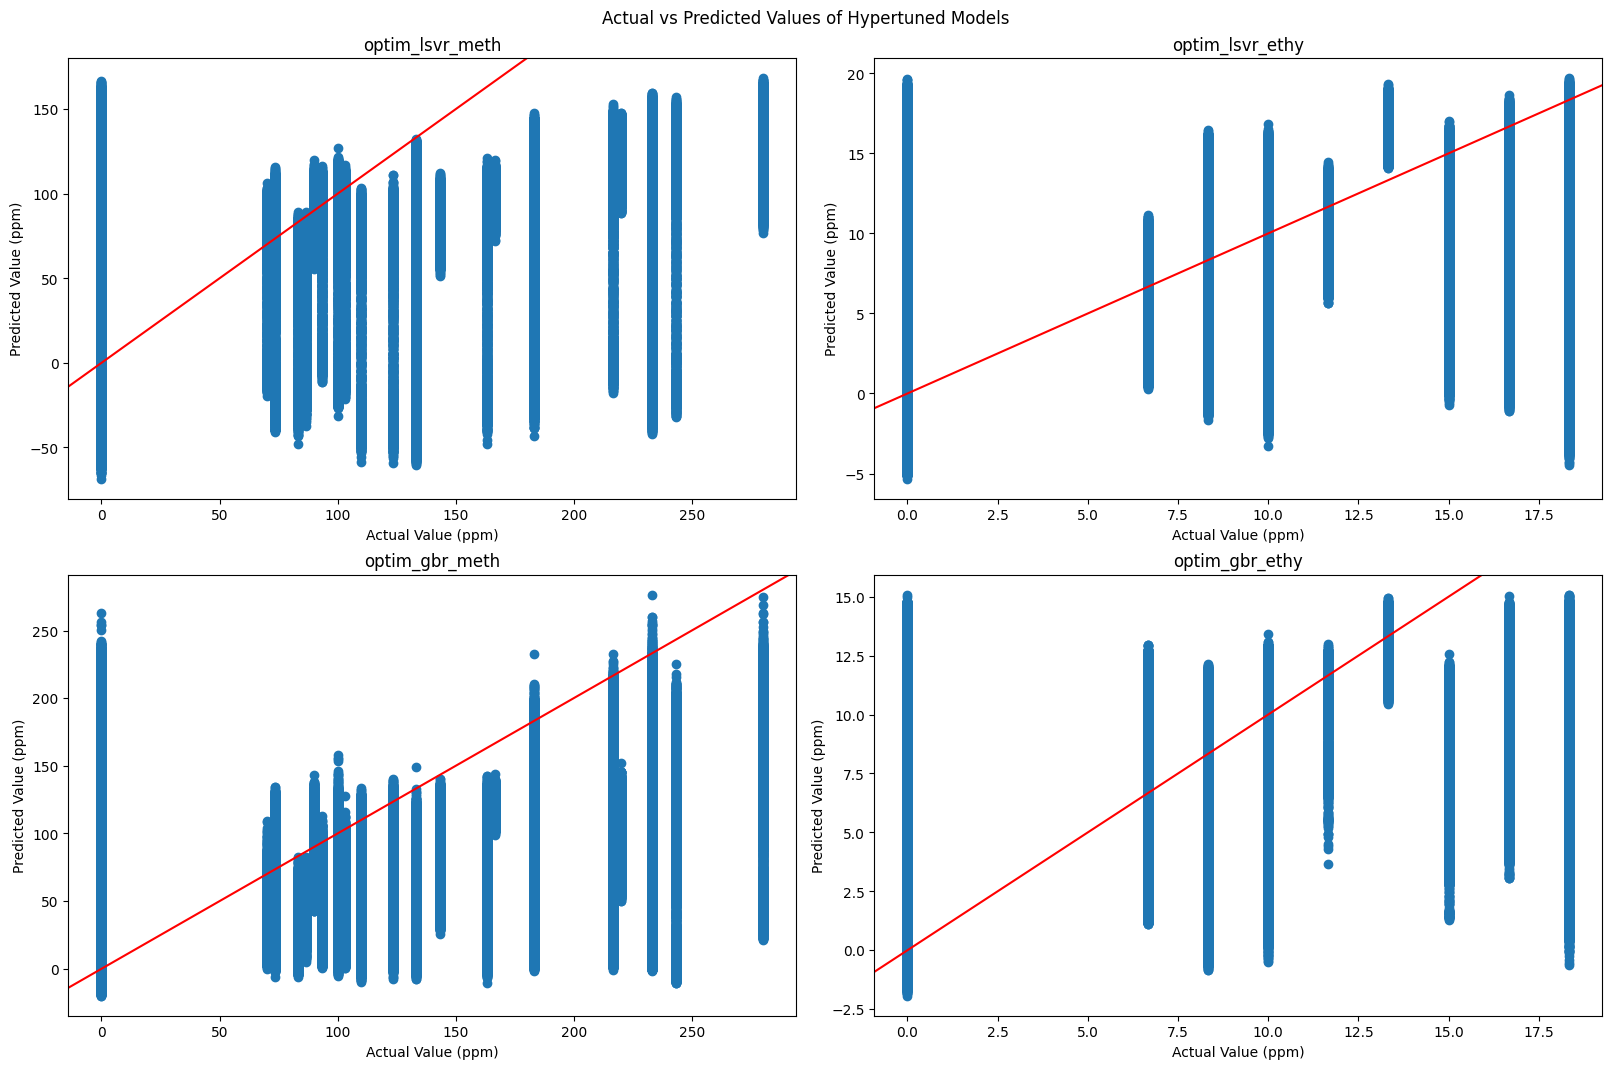

In [71]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.set_ylabel("Predicted Value (ppm)")
  ax1.set_xlabel("Actual Value (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_best_model[1], curr_best_model[2])
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

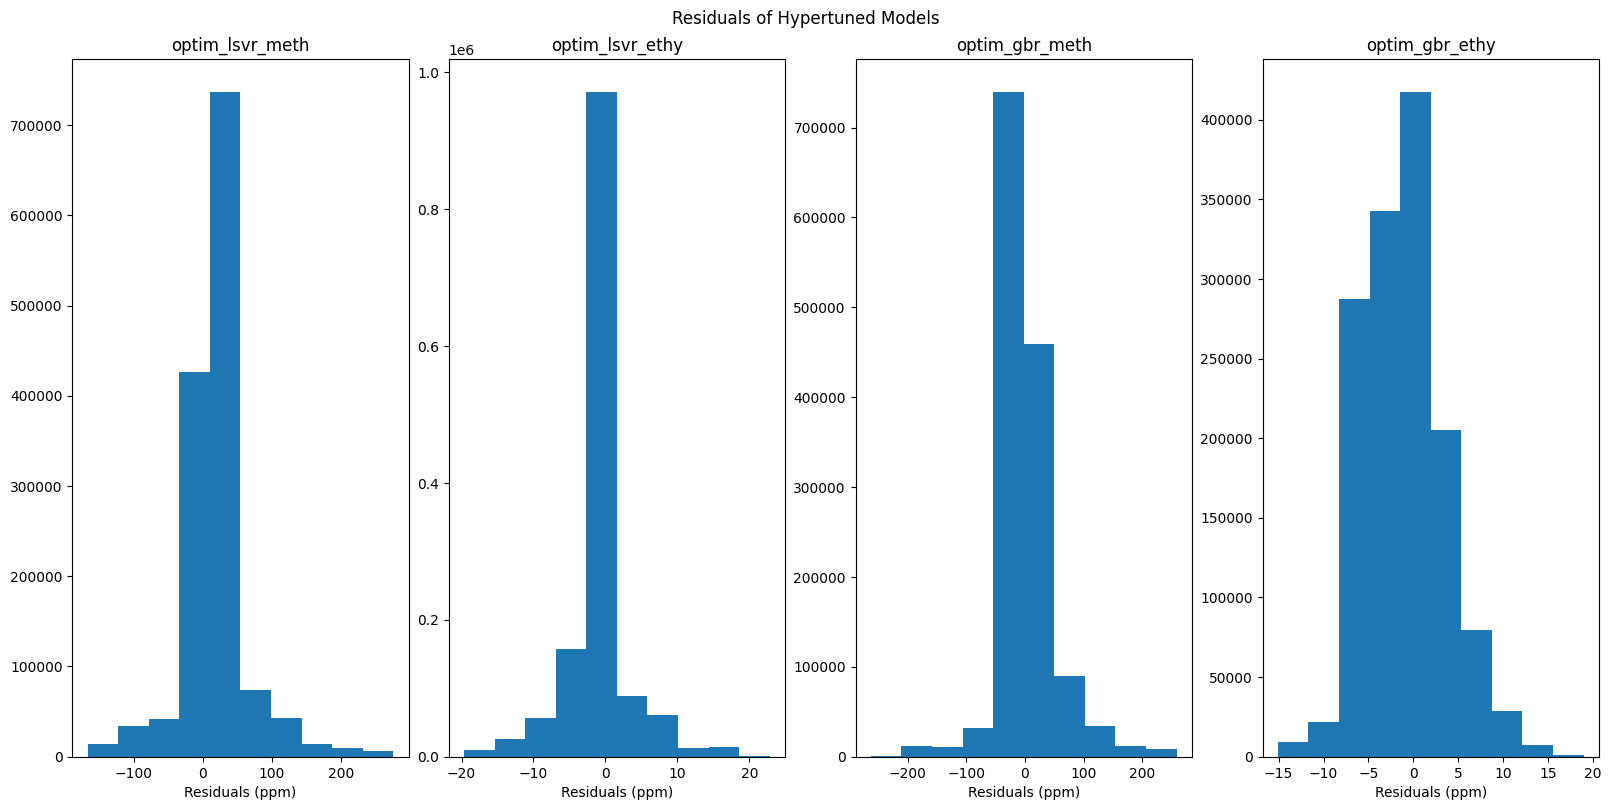

In [72]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  # print(residuals[i].shape, residuals[i])
  ax1.hist(curr_best_model[1] - curr_best_model[2])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

1399799

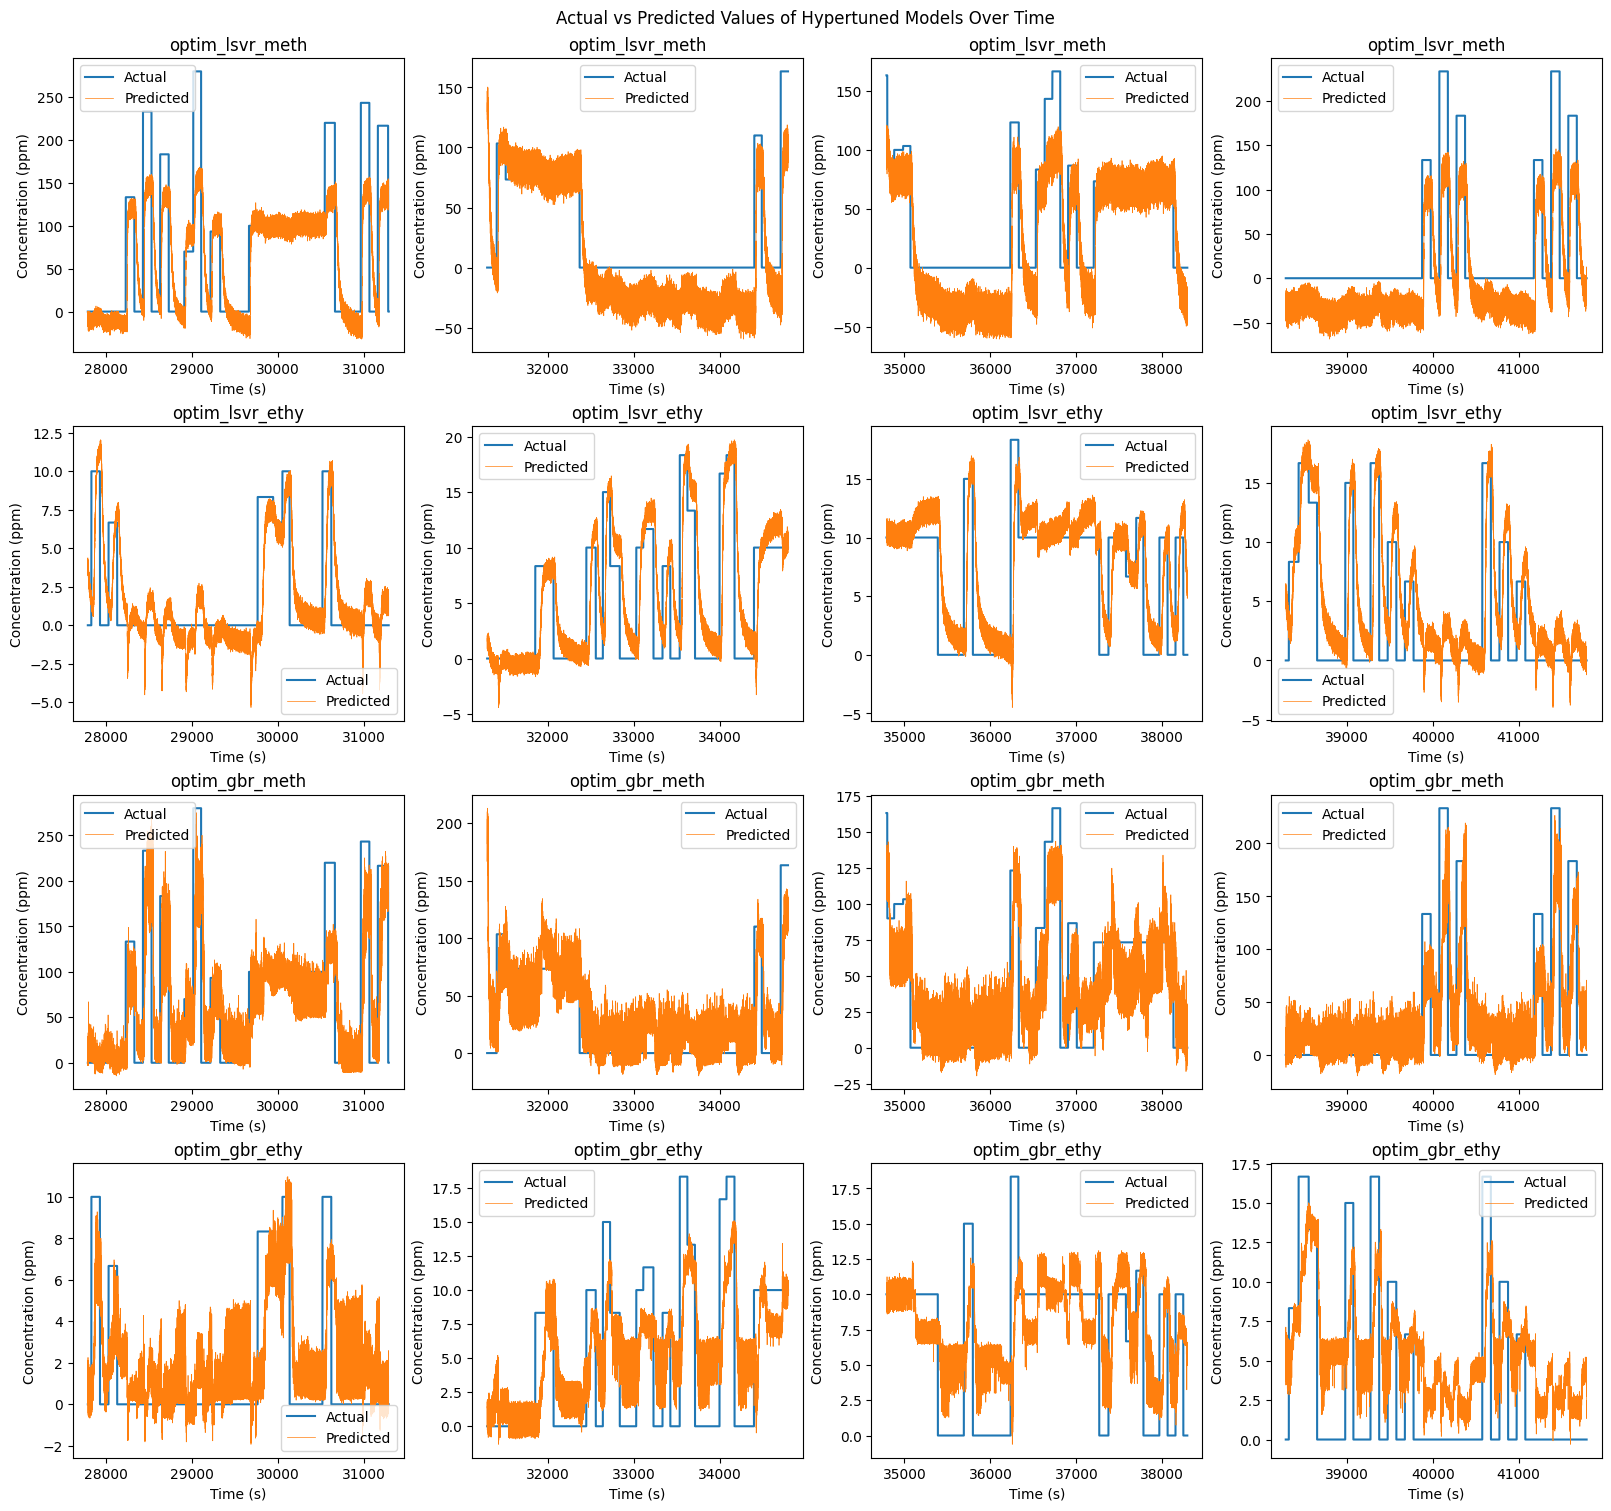

In [83]:
# Make plots of actual vs predicted values over time
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models Over Time")
num_ranges = 4
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]


  for j in range(num_ranges):
    # Plot the ith range
    # Plot the predicted y values vs the actual y values
    ax1 = fig.add_subplot(len(model_collections), num_ranges, i * num_ranges + j + 1)
    ax1.set_ylabel("Concentration (ppm)")
    ax1.set_xlabel("Time (s)")
    ax1.title.set_text(curr_best_model_label)
    data_len = len(x1_test['Time'])
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[1][j * data_len // 4: (j + 1) * data_len // 4], label = "Actual")
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[2][j * data_len // 4: (j + 1) * data_len // 4], label = "Predicted", linewidth = 0.5)
    ax1.legend()
  # Plot the line y = x
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()